# Automotive Industry in Canada - Exploratory Data Analysis 

### Team members

• Vaibhav Chaudhary <br>
• Neha Dewangan <br>
• Harold Epinosa <br>
• Adebola Olaberinjo <br>
• Mahima Gupta <br>

This project aims to carry out an exploratory analysis of various data sets in order to understand the automotive industry in Canada and help investors interested in this industry to understand sales behavior from different angles.

### Data sets
Each of the data sets were downloaded from the official statistics website of Canada. 

#### D1- New motor vehicle sales 
• Release date: 2021-10-10 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000101 <br>
• This dataset contains information on passenger car and truck sales by province and by manufacturing origin.

#### D2- Retail trade sales of motor vehicle and parts  dealers 
• Release date: 2021-10-22 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000803 <br>
• This dataset contains information about retail sales by new car dealers, use car dealers, automotive parts and other vehicle dealers.

#### D3- New motor vehicle registrations
• Release date: 2021-07-27 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002101 <br>
• This dataset contains information about vehicle registrations like battery electric cars, Hybrid electric, and plug-in hybrid electric cars.

#### D4- Financial estimates of motor vehicle and parts dealers
• Release date: 2021-02-17 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010006602 <br>
• This dataset contains information about financial information of dealers from D2, like gross margin, closing and opening inventory, cost of goods sold, among others. 

#### D5- Population estimates
• Release date: 2021-10-27 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901 <br>
• This dataset contains information about population by province. 

All data sets have different date ranges. For the purpose of our analysis, we will work for a range of 5 years, from 2015 to 2019.

### Packages
For this project we are using the below packages:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Exploratory Data Analysis 
## D1- New motor vehicle sales

In [2]:
#Import data
D1 = pd.read_csv('D1- New motor vehicle sales.csv')

C:\Users\harol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Check first records
D1.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,2756.0,NaN,NaN,NaN,0
1,1946-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169913,1.1.1.2.1,4507.0,NaN,NaN,NaN,0
2,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169920,1.2.1.1.1,1102.0,NaN,NaN,NaN,0
3,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Seasonally adjusted,Units,300,units,0,v42169921,1.2.1.1.2,1468.0,NaN,NaN,t,0
4,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169922,1.2.1.2.1,1604.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two columns for easy analysis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [4]:
#Split the Ref Date in two columns
D1split = pd.DataFrame(D1.REF_DATE.str.split('-',1).tolist(),
                                 columns = ['Year','Month',])

#Join the result in the original data set
D1join = D1split.join(D1)

#Drop the column 
D1drop = D1join.drop(columns=['REF_DATE', 'DGUID', 'Seasonal adjustment', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])


#Change data type of year
D1drop['Year'].astype('int32').dtypes

#Remove unnecessary rows
D1Clean = D1drop[(D1drop['Year'] >= '2015') & (D1drop['Year'] <= '2019') & (D1drop['GEO'] != 'Canada') & (D1drop['Vehicle type'] != 'Total, new motor vehicles') & (D1drop['Origin of manufacture'] != 'Total, country of manufacture') & (D1drop['Origin of manufacture'] != 'Total, overseas')]


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two columns for easy analysis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [5]:
#Check first records of the clean data
D1Clean.head()

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,VALUE
134400,2015,01,Newfoundland and Labrador,Passenger cars,North America,Units,296.0
134401,2015,01,Newfoundland and Labrador,Passenger cars,North America,Dollars,6772.0
134404,2015,01,Newfoundland and Labrador,Passenger cars,Japan,Units,NaN
134405,2015,01,Newfoundland and Labrador,Passenger cars,Japan,Dollars,NaN
134406,2015,01,Newfoundland and Labrador,Passenger cars,Other countries,Units,NaN


In the previous result it can be seen that in the variable "VALUE" there are two types of value, units and dollars. Therefore, we consider it necessary to change the variables Units and Dollars to columns for better analysis.

In [6]:
#Create Units column
Units = D1Clean[D1Clean['Sales'] == 'Units']\
.drop(columns=['Year', 'Month', 'GEO', 'Vehicle type', 'Origin of manufacture', 'Sales'])\
.rename(columns={'VALUE':'Units'})

#Create Dollars data set
Dollars = D1Clean[D1Clean['Sales'] == 'Dollars']\
.drop(columns=['Sales'])\
.rename(columns={'VALUE':'Sales'})


Dollars.insert(0, 'New_ID', range(1, 1 + len(Dollars)))
a = Dollars.set_index('New_ID')

Units.insert(0, 'New_ID', range(1, 1 + len(Units)))
b = Units.set_index('New_ID')

D1Clean1 = pd.concat([a, b], axis=1)
D1Clean1

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units
New_ID,,,,,,,
1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0
2,2015,01,Newfoundland and Labrador,Passenger cars,Japan,NaN,NaN
3,2015,01,Newfoundland and Labrador,Passenger cars,Other countries,NaN,NaN
4,2015,01,Newfoundland and Labrador,Trucks,North America,NaN,NaN
5,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0
...,...,...,...,...,...,...,...
2396,2019,12,Alberta,Trucks,North America,578998.0,10443.0
2397,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0
2398,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [7]:
D1Clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 1 to 2400
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2400 non-null   object 
 1   Month                  2400 non-null   object 
 2   GEO                    2400 non-null   object 
 3   Vehicle type           2400 non-null   object 
 4   Origin of manufacture  2400 non-null   object 
 5   Sales                  2064 non-null   float64
 6   Units                  2064 non-null   float64
dtypes: float64(2), object(5)
memory usage: 150.0+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, we note that the 'Sales and Units' variables appear to have missing data.

In [8]:
D1Clean1.isnull().sum()

Year                       0
Month                      0
GEO                        0
Vehicle type               0
Origin of manufacture      0
Sales                    336
Units                    336
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no car sales, in the period of time related in the data set.

In [9]:
#Remove null values
D1Clean3 = D1Clean1[D1Clean1['Sales'].notna() & D1Clean1['Units'].notna()] 

In [10]:
#Check null values again
D1Clean3.isnull().sum()

Year                     0
Month                    0
GEO                      0
Vehicle type             0
Origin of manufacture    0
Sales                    0
Units                    0
dtype: int64

In [11]:
#Check the clean data set
D1Clean3

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units
New_ID,,,,,,,
1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0
5,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0
9,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0
10,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0
11,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0
...,...,...,...,...,...,...,...
2396,2019,12,Alberta,Trucks,North America,578998.0,10443.0
2397,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0
2398,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0


### Analyzing Numeric Variables

In [12]:
#Analysis of Units variable
round(D1Clean3['Units'].describe())

count     2064.0
mean      4179.0
std       7706.0
min         17.0
25%        335.0
50%       1257.0
75%       3600.0
max      51912.0
Name: Units, dtype: float64

In [13]:
#Analysis of Dollars variable
round(D1Clean3['Sales'].describe())

count       2064.0
mean      168080.0
std       336560.0
min          443.0
25%        10102.0
50%        40858.0
75%       148844.0
max      2528241.0
Name: Sales, dtype: float64

In the statistical analysis of the variables units and sales, a large range of numbers is observed between the minimum number and the maximum number. This is because the observation represents the total sales for a particular month of a specific type of product and with a defined manufacturing origin. <br>

This makes the numerical analysis for these two variables unclear. So we decided to create a new column establishing the unit price of the cars.

In [14]:
Unit_price = round(D1Clean3.Sales / D1Clean3.Units)

In [15]:
D1Clean3.insert(loc=7, column='Unit_price', value=Unit_price)

In [16]:
D1Clean3

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price
New_ID,,,,,,,,
1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0
5,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0,24.0
9,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0,24.0
10,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0,27.0
11,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0,27.0
...,...,...,...,...,...,...,...,...
2396,2019,12,Alberta,Trucks,North America,578998.0,10443.0,55.0
2397,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0,42.0
2398,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0,32.0


In [17]:
#Analysis of Unit_price variable
D1Clean3['Unit_price'].describe()

count    2064.000000
mean       35.320736
std         8.361607
min        22.000000
25%        28.000000
50%        33.000000
75%        43.000000
max        71.000000
Name: Unit_price, dtype: float64

The above result is clearer for the context of our data set. 2064 observations are observed, where the minimum price per unit is 22 thousand dollars and the maximum price is 71 thousand dollars. This makes sense, since our dataset contains sales of passenger cars and trucks.

Now we will see the distribution of this variable:

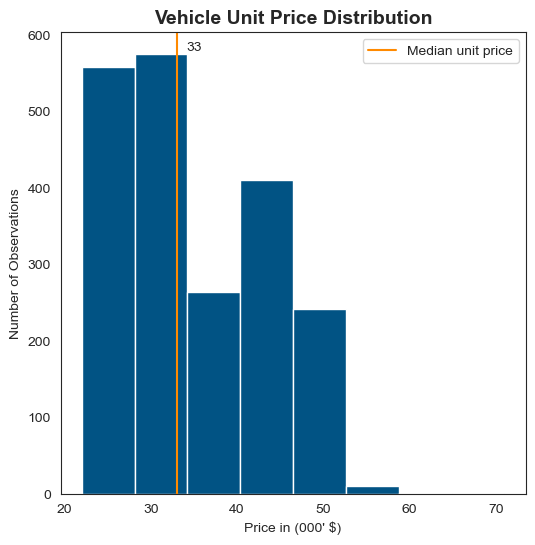

In [18]:
#Calculate median
median_unitprice = np.median(D1Clean3['Unit_price'])

#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D1Clean3["Unit_price"], 
         bins = 8, 
        color = "#015384")
plt.title('Vehicle Unit Price Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Price in (000' $)")
plt.ylabel("Number of Observations")

ax.axvline(median_unitprice, color='#FF8A00', label="Median unit price")
ax.legend()

plt.annotate('33', xy=(20, 1),  xycoords='data',
            xytext=(0.27, 0.96), textcoords='axes fraction')
plt.show()

According to the result, there is a greater concentration of variables towards the left side of the plot. This means that this distribution is skewed to the right. In the context of the data set, it means that most vehicles are below 50 thousand, with a few with a value greater than 60 thousand, which can refer to trucks.

Now, we want to find the relationship between the Units and Sales:

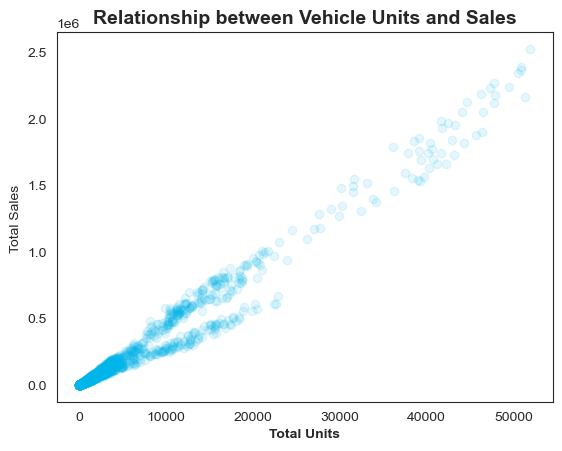

In [19]:
scatter = plt.scatter(D1Clean3['Units'],
           D1Clean3['Sales'],
           alpha = 0.1,
                     color = '#00B5E9')
plt.title("Relationship between Vehicle Units and Sales",
         fontsize = 14,
         weight = 'bold')
plt.xlabel("Total Units", weight = 'bold')
plt.ylabel("Total Sales ")
plt.show()

In the plot it can be seen that there is a strong relationship between total sales and total units sold.

### Analyzing Categorical Variables

#### GEO Column 

This column represents the provinces of Canada. This variable has 2064 observations with 10 uniques values

In [20]:
D1Clean3['GEO'].describe()

count            2064
unique             10
top       Nova Scotia
freq              240
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [21]:
D1Clean3.GEO.value_counts()

Nova Scotia                             240
Quebec                                  240
Ontario                                 240
Manitoba                                240
Saskatchewan                            240
Alberta                                 240
British Columbia and the Territories    240
New Brunswick                           192
Newfoundland and Labrador                96
Prince Edward Island                     96
Name: GEO, dtype: int64

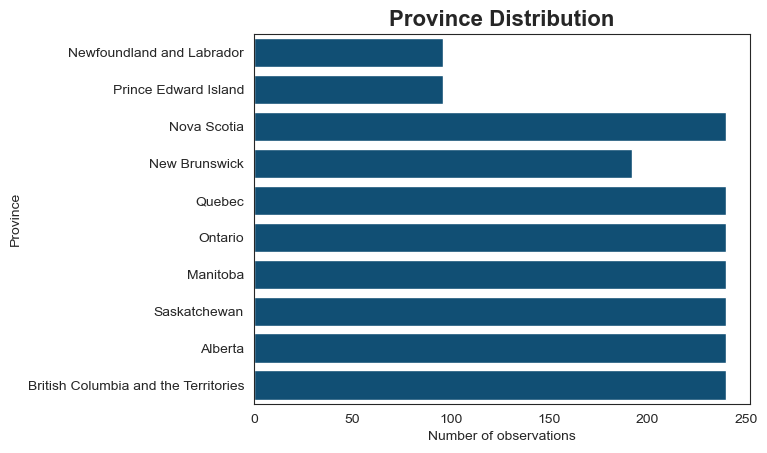

In [22]:
sns.countplot(data=D1Clean3, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Vehicle Type Column 

This column represents the vehicle type sold. This variable has 2064 observations with 2 uniques values

In [23]:
D1Clean3['Vehicle type'].describe()

count               2064
unique                 2
top       Passenger cars
freq                1512
Name: Vehicle type, dtype: object

The next output shows the distribution of the Vehicle Type in this data set

In [24]:
D1Clean3['Vehicle type'].value_counts()

Passenger cars    1512
Trucks             552
Name: Vehicle type, dtype: int64

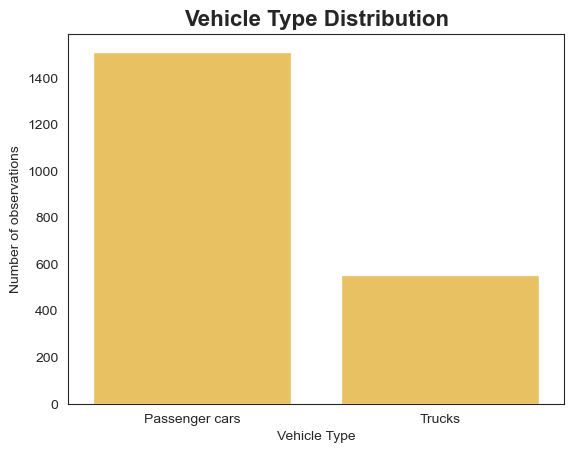

In [25]:
sns.countplot(data=D1Clean3, x='Vehicle type', color = '#FECB4C')
plt.title("Vehicle Type Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Vehicle Type", fontsize = 10)
plt.show()

#### Origin of manufacture Column 

This column represents the Origin of manufacture of vehicles sold. This variable has 2064 observations with 3 uniques values

In [26]:
D1Clean3['Origin of manufacture'].describe()

count              2064
unique                3
top       North America
freq               1152
Name: Origin of manufacture, dtype: object

The next output shows the distribution of the Origin of manufacture in this data set

In [27]:
D1Clean3['Origin of manufacture'].value_counts()

North America      1152
Japan               456
Other countries     456
Name: Origin of manufacture, dtype: int64

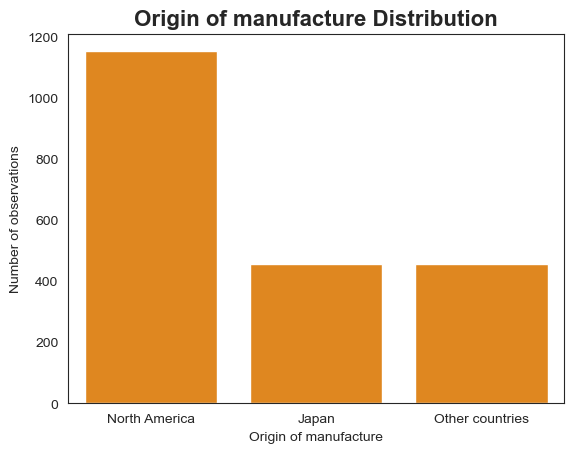

In [28]:
sns.countplot(data=D1Clean3, x='Origin of manufacture', color = '#FF8A00')
plt.title("Origin of manufacture Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Origin of manufacture", fontsize = 10)
plt.show()

### Analyzing Numeric and Categorical Variables

#### Vehicle sold by Origin of manufacture

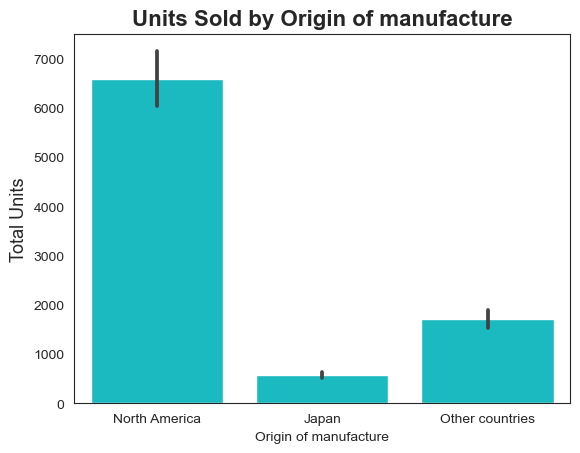

In [29]:
sns.barplot(x="Origin of manufacture", y="Units", data=D1Clean3, color = '#00D3DB')

plt.title("Units Sold by Origin of manufacture", fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Units", fontsize = 13)

plt.show()

In this data set it can be observed that the vehicles sold in Canada, in a large percentage correspond to vehicles manufactured in North America.

#### Total Sales by Vehicle Type

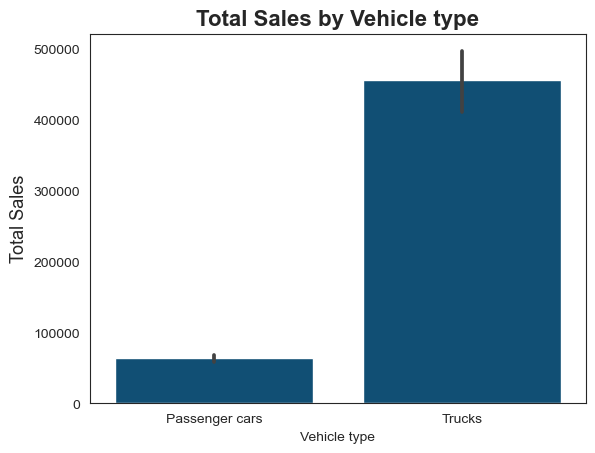

In [30]:
sns.barplot(x="Vehicle type", y="Sales", data=D1Clean3, color = '#015384')

plt.title("Total Sales by Vehicle type", fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 13)


plt.show()

Apparently the sale of trucks generates more income than the sale of passenger cars. This can be presented considering that this type of vehicle is more expensive. This will be part of our final analysis.

## D2- Retail trade sales of motor vehicle and parts  dealers

In [31]:
#Import data
D2 = pd.read_csv('D2- Retail trade sales of motor vehicle and parts  dealers.csv')

In [32]:
#Check first records
D2.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Adjustments,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1991-01,Canada,2016A000011124,Retail trade [44-45],Unadjusted,Dollars,81,thousands,3,v52367096,1.1.1,12588862.0,NaN,NaN,NaN,0
1,1991-01,Canada,2016A000011124,Retail trade [44-45],Seasonally adjusted,Dollars,81,thousands,3,v52367097,1.1.2,15026890.0,NaN,NaN,NaN,0
2,1991-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Unadjusted,Dollars,81,thousands,3,v52367118,1.2.1,2484133.0,NaN,NaN,NaN,0
3,1991-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Seasonally adjusted,Dollars,81,thousands,3,v52367119,1.2.2,3124582.0,NaN,NaN,NaN,0
4,1991-01,Canada,2016A000011124,New car dealers [44111],Unadjusted,Dollars,81,thousands,3,v52367142,1.4.1,2085763.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two columns for easy analysis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [33]:
#Split the Ref Date in two columns
D2split = pd.DataFrame(D2.REF_DATE.str.split('-',1).tolist(),
                                 columns = ['Year','Month',])

#Join the result in the original data set
D2join = D2split.join(D2)

#Drop the column 
D2drop = D2join.drop(columns=['REF_DATE', 'DGUID', 'Adjustments', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 
                              'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Change data type of year
D2drop['Year'].astype('int32').dtypes

#variables to filter
NAICS = ['Automotive parts, accessories and tire stores [4413]', 'New car dealers [44111]',
         'Other motor vehicle dealers [4412]','Used car dealers [44112]']

Province = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Northwest Territories',
           'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan']

#Remove unnecessary rows
D2Clean = D2drop[(D2drop['Year'] >= '2015') & (D2drop['Year'] <= '2019') & (D2drop['GEO'].isin(Province)) & 
                 (D2drop['North American Industry Classification System (NAICS)'].isin(NAICS))]

In [34]:
#Check shape and head of the clean data
print(D2Clean.shape)

(2638, 5)


In [35]:
D2Clean.head()

,Year,Month,GEO,North American Industry Classification System (NAICS),VALUE
80870,2015,01,Newfoundland and Labrador,New car dealers [44111],98326.0
80871,2015,01,Newfoundland and Labrador,Used car dealers [44112],7604.0
80872,2015,01,Newfoundland and Labrador,Other motor vehicle dealers [4412],17624.0
80873,2015,01,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",8143.0
80900,2015,01,Prince Edward Island,New car dealers [44111],NaN


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [36]:
D2Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 80870 to 115431
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Year                                                   2638 non-null   object 
 1   Month                                                  2638 non-null   object 
 2   GEO                                                    2638 non-null   object 
 3   North American Industry Classification System (NAICS)  2638 non-null   object 
 4   VALUE                                                  2312 non-null   float64
dtypes: float64(1), object(4)
memory usage: 123.7+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary.

However, we note that the 'VALUE' variables appear to have missing data.

In [37]:
D2Clean.isnull().sum()

Year                                                       0
Month                                                      0
GEO                                                        0
North American Industry Classification System (NAICS)      0
VALUE                                                    326
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no sales, in the period of time related in the data set.

In [38]:
#Remove null values
D2Clean = D2Clean[D2Clean['VALUE'].notna()]

In [39]:
#Check null values again
D2Clean.isnull().sum()

Year                                                     0
Month                                                    0
GEO                                                      0
North American Industry Classification System (NAICS)    0
VALUE                                                    0
dtype: int64

In [40]:
#Check the clean data set
D2Clean

,Year,Month,GEO,North American Industry Classification System (NAICS),VALUE
80870,2015,01,Newfoundland and Labrador,New car dealers [44111],98326.0
80871,2015,01,Newfoundland and Labrador,Used car dealers [44112],7604.0
80872,2015,01,Newfoundland and Labrador,Other motor vehicle dealers [4412],17624.0
80873,2015,01,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",8143.0
80902,2015,01,Prince Edward Island,Other motor vehicle dealers [4412],1939.0
...,...,...,...,...,...
115335,2019,12,British Columbia,New car dealers [44111],1103315.0
115336,2019,12,British Columbia,Used car dealers [44112],96560.0
115337,2019,12,British Columbia,Other motor vehicle dealers [4412],71197.0
115338,2019,12,British Columbia,"Automotive parts, accessories and tire stores ...",111380.0


### Analyzing Numeric Variables

In [41]:
#Analysis of VALUE variable
round(D2Clean['VALUE'].describe())

count       2312.0
mean      329765.0
std       748347.0
min          483.0
25%        22150.0
50%        91922.0
75%       237343.0
max      5583054.0
Name: VALUE, dtype: float64

In the statistical analysis of the variable sales(VALUE), a large range of numbers is observed between the minimum number and the maximum number. This is because the observation represents the total sales for a particular month of a specific NAICS classification and geographical location (GEO).

#### Dealer sales distribution by year

In [42]:
#Average sales distribution by year
avg_sales = D2Clean.groupby(['Year'])\
.agg({'VALUE':'mean'})\
.rename(columns={'VALUE':'avg_sales'})\
.reset_index()

avg_sales

,Year,avg_sales
0,2015,289694.154185
1,2016,315176.032538
2,2017,342397.759140
3,2018,347826.597849
4,2019,352560.541756


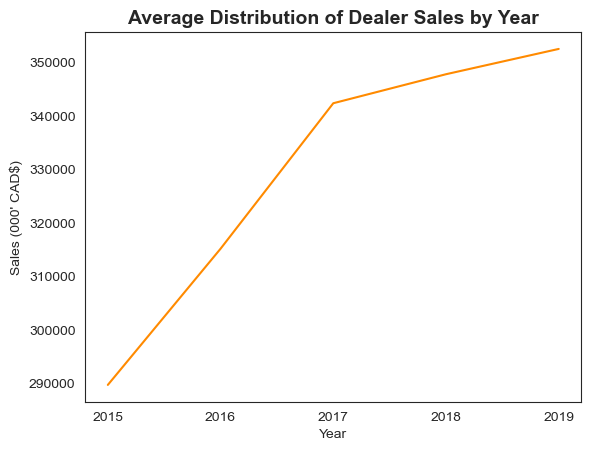

In [43]:
plt.plot(avg_sales["Year"], avg_sales["avg_sales"], color = '#FF8A00')
plt.title("Average Distribution of Dealer Sales by Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Sales (000' CAD$)")
plt.xlabel("Year")

plt.show()

According to the plot, sales have been increasing since 2016.

Now, we want to find the relationship between the Used Car dealers Sales and Other motor vehicle dealers sales:

In [44]:
new_used_cars = D2Clean.groupby(['Year', 'North American Industry Classification System (NAICS)'])\
.agg({'VALUE':'mean'})\
.rename(columns={'VALUE':'avg_sales'})\
.reset_index()\
.pivot(index='Year', columns = 'North American Industry Classification System (NAICS)', values = 'avg_sales')\
.reset_index()

new_used_cars

North American Industry Classification System (NAICS),Year,"Automotive parts, accessories and tire stores [4413]",New car dealers [44111],Other motor vehicle dealers [4412],Used car dealers [44112]
0,2015,66010.241667,9.932686e+05,68935.703390,75856.472222
1,2016,67874.388430,1.054059e+06,77151.636364,90592.476636
2,2017,78576.083333,1.195428e+06,77469.115385,99146.317757
3,2018,84203.366667,1.201274e+06,79449.196970,108667.419048
4,2019,85779.350000,1.218096e+06,79639.136364,114817.859813


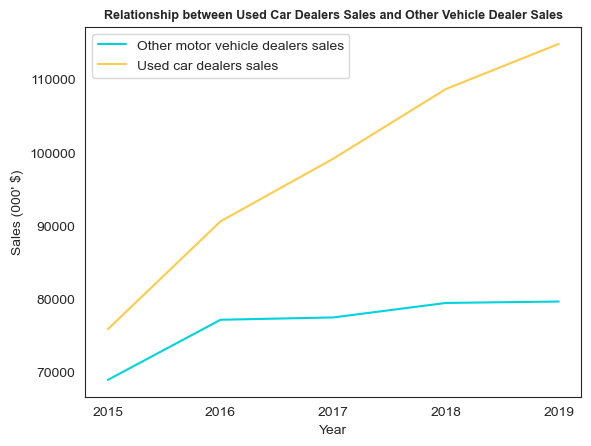

In [45]:
plt.plot(new_used_cars["Year"], new_used_cars["Other motor vehicle dealers [4412]"], color = '#00D3DB')
plt.plot(new_used_cars["Year"], new_used_cars["Used car dealers [44112]"], color = '#FECB4C')

plt.title("Relationship between Used Car Dealers Sales and Other Vehicle Dealer Sales", fontsize = 9, fontweight = 'bold')

plt.ylabel("Sales (000' $)")
plt.xlabel("Year")

labels = ['Other motor vehicle dealers sales', 'Used car dealers sales']
plt.legend(labels = labels, fontsize = 'medium')

plt.show()

In the plot it can be seen that there is a relationship between these two variables.

### Analyzing Categorical Variables

#### GEO Column 

This column represents the provinces of Canada. This variable has 2312 observations with 11 uniques values

In [46]:
D2Clean['GEO'].describe()

count       2312
unique        11
top       Quebec
freq         240
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [47]:
D2Clean.GEO.value_counts()

Quebec                       240
British Columbia             240
Newfoundland and Labrador    239
New Brunswick                239
Ontario                      239
Manitoba                     239
Alberta                      239
Nova Scotia                  238
Saskatchewan                 237
Prince Edward Island         120
Northwest Territories         42
Name: GEO, dtype: int64

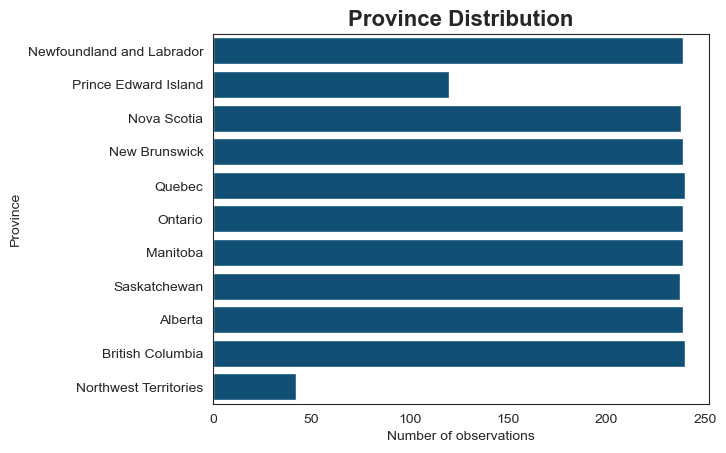

In [48]:
sns.countplot(data=D2Clean, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Dealer classification

This column represents the dealer classification. This variable has 2312 observations with 4 uniques values

In [49]:
D2Clean['North American Industry Classification System (NAICS)'].describe()

count                                   2312
unique                                     4
top       Other motor vehicle dealers [4412]
freq                                     633
Name: North American Industry Classification System (NAICS), dtype: object

In [50]:
D2Clean['North American Industry Classification System (NAICS)'].value_counts()

Other motor vehicle dealers [4412]                      633
Automotive parts, accessories and tire stores [4413]    601
New car dealers [44111]                                 544
Used car dealers [44112]                                534
Name: North American Industry Classification System (NAICS), dtype: int64

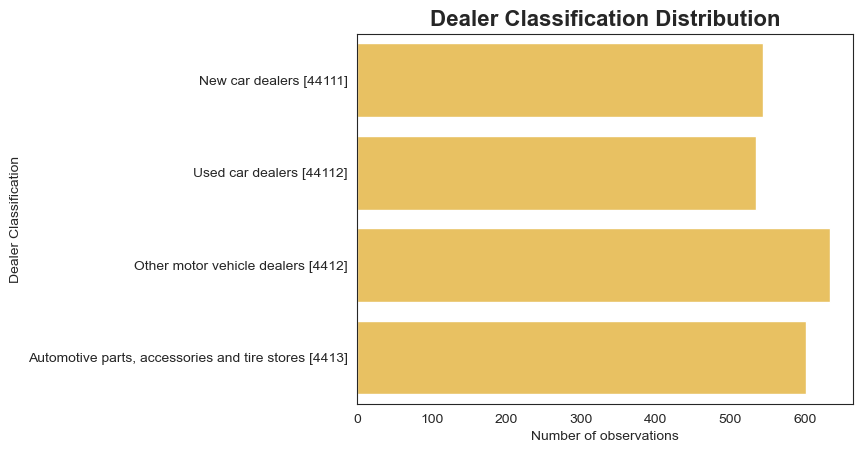

In [51]:
sns.countplot(data=D2Clean, y='North American Industry Classification System (NAICS)', color = '#FECB4C')
plt.title("Dealer Classification Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Dealer Classification", fontsize = 10)
plt.show()

## D3- New motor vehicle registrations

In [52]:
#Import data
D3 = pd.read_csv('D3- New motor vehicle registrations.csv')

In [53]:
#Check first records
D3.head()

,REF_DATE,GEO,DGUID,Fuel type,Vehicle type,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2011,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1079014832,1.1.1.1,1623288.0,NaN,NaN,NaN,0
1,2011,Canada,2016A000011124,All fuel types,Passenger cars,Number of vehicles,Units,300,units,0,v1079014839,1.1.2.1,667842.0,NaN,NaN,NaN,0
2,2011,Canada,2016A000011124,All fuel types,Pickup trucks,Number of vehicles,Units,300,units,0,v1079014846,1.1.3.1,298728.0,NaN,NaN,NaN,0
3,2011,Canada,2016A000011124,All fuel types,Multi-purpose vehicles,Number of vehicles,Units,300,units,0,v1079014853,1.1.4.1,530754.0,NaN,NaN,NaN,0
4,2011,Canada,2016A000011124,All fuel types,Vans,Number of vehicles,Units,300,units,0,v1079014860,1.1.5.1,125964.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [54]:
#Drop the column 
D3drop = D3.drop(columns=['DGUID', 'Statistics', 'UOM', 'UOM_ID','SCALAR_FACTOR',  'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Remove unnecessary rows
D3filter = D3drop[(D3drop['REF_DATE'] >= 2012) & (D3drop['REF_DATE'] <= 2019) & (D3drop['GEO'] != 'Canada') & (D3drop['Vehicle type'] != 'Total, vehicle type') & (D3drop['Fuel type'] != 'All fuel types')]

In [55]:
D3filter

,REF_DATE,GEO,Fuel type,Vehicle type,VALUE
426,2012,Newfoundland and Labrador,Gasoline,Passenger cars,NaN
427,2012,Newfoundland and Labrador,Gasoline,Pickup trucks,NaN
428,2012,Newfoundland and Labrador,Gasoline,Multi-purpose vehicles,NaN
429,2012,Newfoundland and Labrador,Gasoline,Vans,NaN
431,2012,Newfoundland and Labrador,Diesel,Passenger cars,NaN
...,...,...,...,...,...
3459,2019,British Columbia and the Territories,Plug-in hybrid electric,Vans,206.0
3461,2019,British Columbia and the Territories,Other fuel types,Passenger cars,20.0
3462,2019,British Columbia and the Territories,Other fuel types,Pickup trucks,0.0
3463,2019,British Columbia and the Territories,Other fuel types,Multi-purpose vehicles,7.0


In [56]:
#Split and rename Fuel type in columns 
Diesel = D3filter[D3filter['Fuel type'] == 'Diesel']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Diesel'})

Hybrid_electric = D3filter[D3filter['Fuel type'] == 'Hybrid electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Hybrid_electric'})

Battery_electric = D3filter[D3filter['Fuel type'] == 'Battery electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Battery_electric'})

Plug_in_hybrid_electric = D3filter[D3filter['Fuel type'] == 'Plug-in hybrid electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Plug_in_hybrid_electric'})

Other_fuel_types = D3filter[D3filter['Fuel type'] == 'Other fuel types']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Other_fuel_types'})

Gasoline = D3filter[D3filter['Fuel type'] == 'Gasoline']\
.drop(columns=['Fuel type'])\
.rename(columns={'VALUE':'Gasoline'})

Diesel.insert(0, 'New_ID', range(1, 1 + len(Diesel)))
a = Diesel.set_index('New_ID')

Hybrid_electric.insert(0, 'New_ID', range(1, 1 + len(Hybrid_electric)))
b = Hybrid_electric.set_index('New_ID')

Battery_electric.insert(0, 'New_ID', range(1, 1 + len(Battery_electric)))
c = Battery_electric.set_index('New_ID')

Plug_in_hybrid_electric.insert(0, 'New_ID', range(1, 1 + len(Plug_in_hybrid_electric)))
d = Plug_in_hybrid_electric.set_index('New_ID')

Other_fuel_types.insert(0, 'New_ID', range(1, 1 + len(Other_fuel_types)))
e = Other_fuel_types.set_index('New_ID')

Gasoline.insert(0, 'New_ID', range(1, 1 + len(Gasoline)))
f = Gasoline.set_index('New_ID')

D3Clean = pd.concat([f, a, b, c, d, e], axis=1)
D3Clean

,REF_DATE,GEO,Vehicle type,Gasoline,Diesel,Hybrid_electric,Battery_electric,Plug_in_hybrid_electric,Other_fuel_types
New_ID,,,,,,,,,
1,2012,Newfoundland and Labrador,Passenger cars,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,Newfoundland and Labrador,Pickup trucks,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,Newfoundland and Labrador,Multi-purpose vehicles,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,Newfoundland and Labrador,Vans,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,Prince Edward Island,Passenger cars,3422.0,49.0,113.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
316,2019,Alberta,Vans,NaN,NaN,NaN,NaN,NaN,NaN
317,2019,British Columbia and the Territories,Passenger cars,43835.0,61.0,3970.0,9864.0,2712.0,20.0
318,2019,British Columbia and the Territories,Pickup trucks,36347.0,9215.0,0.0,0.0,0.0,0.0


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [57]:
D3Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 1 to 320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 320 non-null    int64  
 1   GEO                      320 non-null    object 
 2   Vehicle type             320 non-null    object 
 3   Gasoline                 224 non-null    float64
 4   Diesel                   224 non-null    float64
 5   Hybrid_electric          224 non-null    float64
 6   Battery_electric         224 non-null    float64
 7   Plug_in_hybrid_electric  224 non-null    float64
 8   Other_fuel_types         224 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 25.0+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, we note that the 'VALUE' variables appear to have missing data.

In [58]:
D3Clean.isnull().sum()

REF_DATE                    0
GEO                         0
Vehicle type                0
Gasoline                   96
Diesel                     96
Hybrid_electric            96
Battery_electric           96
Plug_in_hybrid_electric    96
Other_fuel_types           96
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no car registration, in the period of time related in the data set.

In [59]:
#Remove null values
D3Clean1 = D3Clean[D3Clean['Gasoline'].notna() & D3Clean['Diesel'].notna() & D3Clean['Hybrid_electric'].notna() &
                  D3Clean['Battery_electric'].notna() & D3Clean['Plug_in_hybrid_electric'].notna() & D3Clean['Other_fuel_types'].notna()]

In [60]:
#Check null values again
D3Clean1.isnull().sum()

REF_DATE                   0
GEO                        0
Vehicle type               0
Gasoline                   0
Diesel                     0
Hybrid_electric            0
Battery_electric           0
Plug_in_hybrid_electric    0
Other_fuel_types           0
dtype: int64

In [61]:
#Check the clean data set
D3Clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 5 to 320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 224 non-null    int64  
 1   GEO                      224 non-null    object 
 2   Vehicle type             224 non-null    object 
 3   Gasoline                 224 non-null    float64
 4   Diesel                   224 non-null    float64
 5   Hybrid_electric          224 non-null    float64
 6   Battery_electric         224 non-null    float64
 7   Plug_in_hybrid_electric  224 non-null    float64
 8   Other_fuel_types         224 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 17.5+ KB


### Analyzing Numeric Variables

This analysis will be carried out with the vehicle registration of Hybrid electric and Battery electric cars.

In [62]:
D3Clean1['Hybrid_electric'].describe()

count     224.000000
mean      748.620536
std      1639.025209
min         0.000000
25%         0.000000
50%         8.000000
75%       263.250000
max      7711.000000
Name: Hybrid_electric, dtype: float64

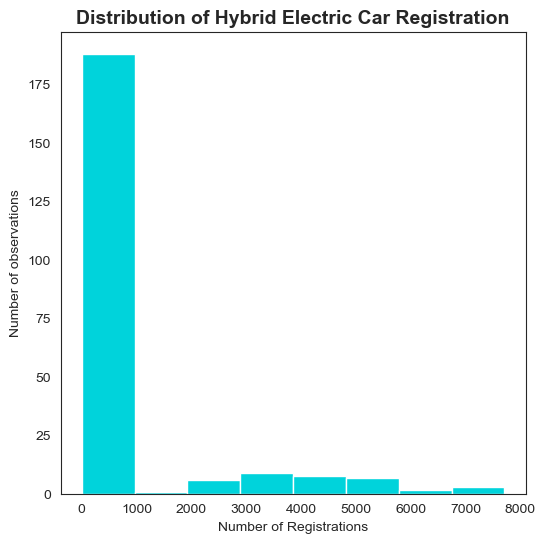

In [63]:
#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D3Clean1['Hybrid_electric'], 
         bins = 8, 
        color = "#00D3DB")
plt.title('Distribution of Hybrid Electric Car Registration', fontsize = 14, weight = 'bold')
plt.xlabel("Number of Registrations")
plt.ylabel("Number of observations")

plt.show()

In [64]:
D3Clean1['Battery_electric'].describe()

count      224.000000
mean       353.522321
std       1372.428838
min          0.000000
25%          0.000000
50%          0.000000
75%         11.250000
max      11756.000000
Name: Battery_electric, dtype: float64

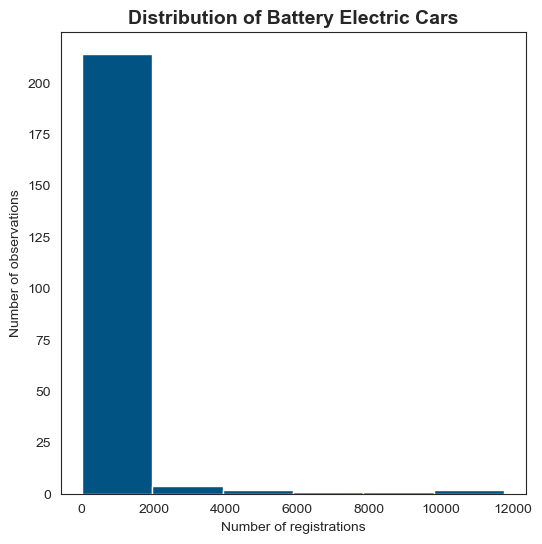

In [65]:
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D3Clean1['Battery_electric'], 
         bins = 6, 
        color = "#015384")
plt.title('Distribution of Battery Electric Cars', fontsize = 14, weight = 'bold')
plt.xlabel("Number of registrations")
plt.ylabel("Number of observations")

plt.show()

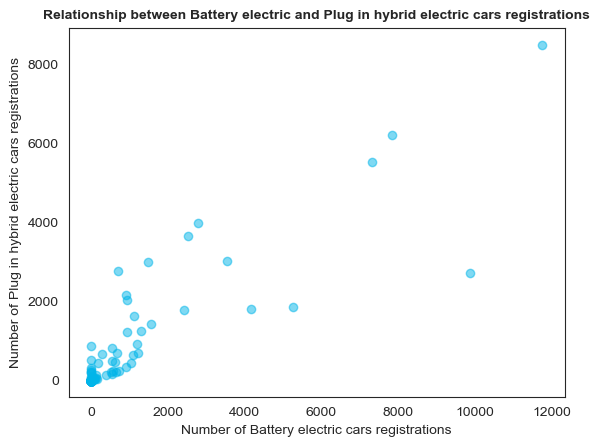

In [66]:
scatter = plt.scatter(D3Clean1['Battery_electric'],
           D3Clean1['Plug_in_hybrid_electric'],
           alpha = 0.5,
                     color = '#00B5E9')
plt.title("Relationship between Battery electric and Plug in hybrid electric cars registrations",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Number of Battery electric cars registrations")
plt.ylabel("Number of Plug in hybrid electric cars registrations")

plt.show()

In [67]:
#Calculate Correlation Coefficient
np.corrcoef(D3Clean1['Battery_electric'], D3Clean1['Plug_in_hybrid_electric'])

array([[1.        , 0.88811995],
       [0.88811995, 1.        ]])

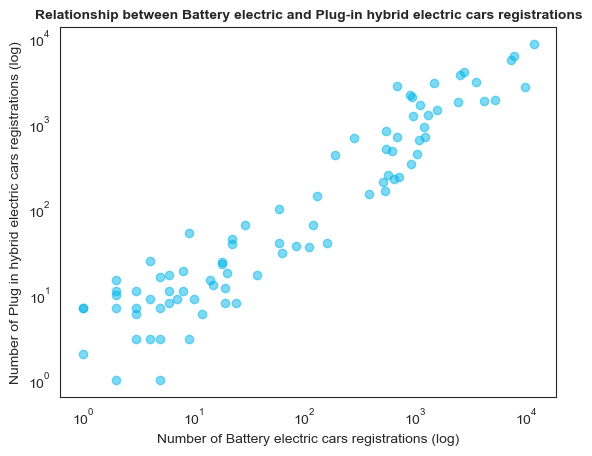

In [68]:
scatter = plt.scatter(D3Clean1['Battery_electric'],
           D3Clean1['Plug_in_hybrid_electric'],
           alpha = 0.5,
                     color = '#00B5E9')

plt.title("Relationship between Battery electric and Plug-in hybrid electric cars registrations",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Number of Battery electric cars registrations (log)")
plt.ylabel("Number of Plug in hybrid electric cars registrations (log)")


plt.yscale("log")
plt.xscale("log")
plt.show()

### Analyzing Categorical Variables

#### GEO Column 

This column represents the provinces of Canada. This variable has 224 observations with 7 uniques values

In [69]:
D3Clean1['GEO'].describe()

count                      224
unique                       7
top       Prince Edward Island
freq                        32
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [70]:
D3Clean1.GEO.value_counts()

Prince Edward Island                    32
New Brunswick                           32
Quebec                                  32
Ontario                                 32
Manitoba                                32
Saskatchewan                            32
British Columbia and the Territories    32
Name: GEO, dtype: int64

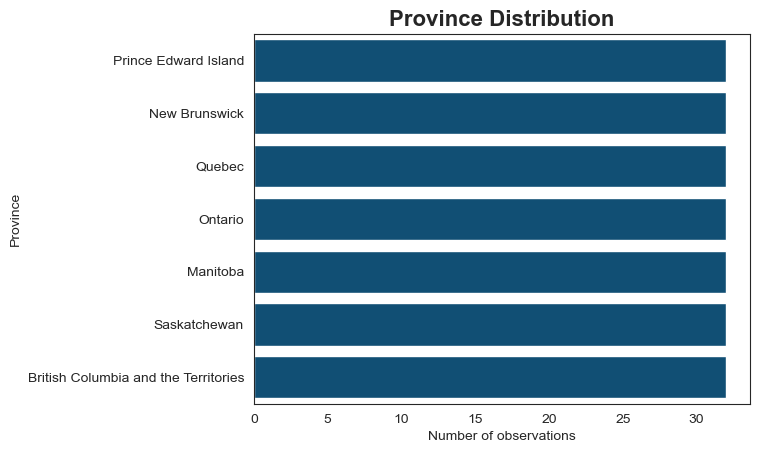

In [71]:
sns.countplot(data=D3Clean1, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Vehicle Type Column 

This column represents the vehicle type sold. This variable has 224 observations with 4 uniques values

In [72]:
D3Clean1['Vehicle type'].describe()

count                224
unique                 4
top       Passenger cars
freq                  56
Name: Vehicle type, dtype: object

The next output shows the distribution of the Vehicle Type in this data set

In [73]:
D3Clean1['Vehicle type'].value_counts()

Passenger cars            56
Pickup trucks             56
Multi-purpose vehicles    56
Vans                      56
Name: Vehicle type, dtype: int64

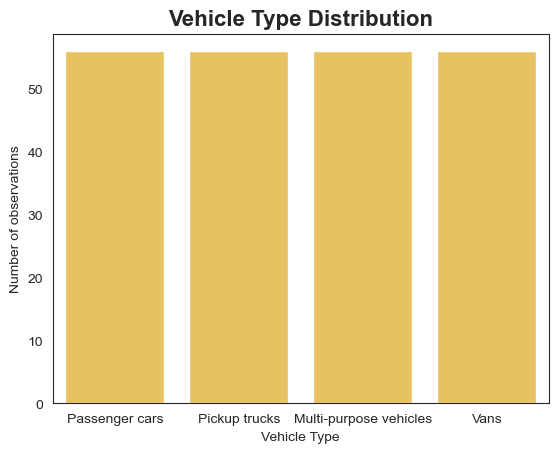

In [74]:
sns.countplot(data=D3Clean1, x='Vehicle type', color = '#FECB4C')
plt.title("Vehicle Type Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Vehicle Type", fontsize = 10)
plt.show()

## D4- Financial estimates of motor vehicle and parts dealers

In [75]:
#Import data
D4 = pd.read_csv('D4- Financial estimates of motor vehicle and parts dealers.csv')

In [76]:
D4.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Financial estimates,Type of store,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Total all stores,Dollars,81,thousands,3,v101257054,1.1.1.1,482166179.0,NaN,NaN,NaN,0
1,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Chain stores,Dollars,81,thousands,3,v101257055,1.1.1.2,233631528.0,NaN,NaN,NaN,0
2,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Non-chain stores,Dollars,81,thousands,3,v101257056,1.1.1.3,248534651.0,NaN,NaN,NaN,0
3,2012,Canada,2016A000011124,Retail trade [44-45],Total operating revenue,Total all stores,Dollars,81,thousands,3,v101257057,1.1.2.1,491316297.0,NaN,NaN,NaN,0
4,2012,Canada,2016A000011124,Retail trade [44-45],Total operating revenue,Chain stores,Dollars,81,thousands,3,v101257058,1.1.2.2,235862535.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals, unrelated column categories) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [77]:
#Drop the column not useful for this analysis
D4drop = D4.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

In [78]:
# Remove rows that are not necessary for our analysis (Year, The totals, unrelated column categories)

listCategorie = ['Automotive parts, accessories and tire stores [4413]', 'New car dealers [44111]','Other motor vehicle dealers [4412]','Used car dealers [44112]']

listYear = [2015, 2016, 2017, 2018, 2019]

D4Clean = D4drop[(D4drop['REF_DATE'].isin(listYear)) & (D4drop['GEO'] != 'Canada') & (D4drop["North American Industry Classification System (NAICS)"].isin(listCategorie)) & (D4drop['Type of store'] == 'Total all stores')]

D4Clean

,REF_DATE,GEO,North American Industry Classification System (NAICS),Financial estimates,Type of store,UOM,VALUE
37500,2015,Newfoundland and Labrador,New car dealers [44111],Sales of goods for resale,Total all stores,Dollars,1755398.0
37503,2015,Newfoundland and Labrador,New car dealers [44111],Total operating revenue,Total all stores,Dollars,1857697.0
37506,2015,Newfoundland and Labrador,New car dealers [44111],Opening inventory,Total all stores,Dollars,362163.0
37509,2015,Newfoundland and Labrador,New car dealers [44111],Purchases,Total all stores,Dollars,1595787.0
37512,2015,Newfoundland and Labrador,New car dealers [44111],Closing inventory,Total all stores,Dollars,359335.0
...,...,...,...,...,...,...,...
81245,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Cost of goods sold,Total all stores,Dollars,NaN
81246,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Total labour remuneration,Total all stores,Dollars,NaN
81247,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Total operating expenses,Total all stores,Dollars,NaN
81248,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Gross margin,Total all stores,Percent,NaN


In [79]:
#Split and rename Financial estimates in columns
Closing_Inventory = D4Clean[D4Clean['Financial estimates'] == 'Closing inventory']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Closing_Inventory'})

Cost_Goods = D4Clean[D4Clean['Financial estimates'] == 'Cost of goods sold']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Cost_Goods'})

Gross_Margin = D4Clean[D4Clean['Financial estimates'] == 'Gross margin']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Gross_Margin'})

Opening_Inventory = D4Clean[D4Clean['Financial estimates'] == 'Opening inventory']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Opening_Inventory'})

Profit_Margin = D4Clean[D4Clean['Financial estimates'] == 'Operating profit margin']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Profit_Margin'})

Purchases = D4Clean[D4Clean['Financial estimates'] == 'Purchases']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Purchases'})

Sales_Goods = D4Clean[D4Clean['Financial estimates'] == 'Sales of goods for resale']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Sales_Goods'})

Labour_Remuneration = D4Clean[D4Clean['Financial estimates'] == 'Total labour remuneration']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Labour_Remuneration'})

Operating_Expenses = D4Clean[D4Clean['Financial estimates'] == 'Total operating expenses']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Operating_Expenses'})

Operating_Revenue = D4Clean[D4Clean['Financial estimates'] == 'Total operating revenue']\
.drop(columns=['Financial estimates','Type of store', 'UOM'])\
.rename(columns={'VALUE':'Operating_Revenue'})

Closing_Inventory.insert(0, 'New_ID', range(1, 1 + len(Closing_Inventory)))
g = Closing_Inventory.set_index('New_ID')

Cost_Goods.insert(0, 'New_ID', range(1, 1 + len(Cost_Goods)))
h = Cost_Goods.set_index('New_ID')

Gross_Margin.insert(0, 'New_ID', range(1, 1 + len(Gross_Margin)))
i = Gross_Margin.set_index('New_ID')

Opening_Inventory.insert(0, 'New_ID', range(1, 1 + len(Opening_Inventory)))
j = Opening_Inventory.set_index('New_ID')

Profit_Margin.insert(0, 'New_ID', range(1, 1 + len(Profit_Margin)))
k = Profit_Margin.set_index('New_ID')

Purchases.insert(0, 'New_ID', range(1, 1 + len(Purchases)))
l = Purchases.set_index('New_ID')

Sales_Goods.insert(0, 'New_ID', range(1, 1 + len(Sales_Goods)))
m = Sales_Goods.set_index('New_ID')

Labour_Remuneration.insert(0, 'New_ID', range(1, 1 + len(Labour_Remuneration)))
n = Labour_Remuneration.set_index('New_ID')

Operating_Expenses.insert(0, 'New_ID', range(1, 1 + len(Operating_Expenses)))
o = Operating_Expenses.set_index('New_ID')

Operating_Revenue.insert(0, 'New_ID', range(1, 1 + len(Operating_Revenue)))
p = Operating_Revenue.set_index('New_ID')

D4Pivot = pd.concat([p, g, h, i, j, k, l, m, n, o], axis=1)

In [80]:
#Check first records of the clean data
D4Pivot.head()

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
New_ID,,,,,,,,,,,,,
1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
5,2015,Prince Edward Island,New car dealers [44111],405845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Check last records of the clean data
D4Pivot.tail()

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
New_ID,,,,,,,,,,,,,
256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",NaN,NaN,17217.0,NaN,NaN,NaN,16555.0,18700.0,2279.0,3524.0
257,2019,Nunavut,New car dealers [44111],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,2019,Nunavut,Used car dealers [44112],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2019,Nunavut,Other motor vehicle dealers [4412],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,2019,Nunavut,"Automotive parts, accessories and tire stores ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking data types and missing data

In [82]:
D4Pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   REF_DATE                                               260 non-null    int64  
 1   GEO                                                    260 non-null    object 
 2   North American Industry Classification System (NAICS)  260 non-null    object 
 3   Operating_Revenue                                      205 non-null    float64
 4   Closing_Inventory                                      205 non-null    float64
 5   Cost_Goods                                             206 non-null    float64
 6   Gross_Margin                                           198 non-null    float64
 7   Opening_Inventory                                      204 non-null    float64
 8   Profit_Margin                                     

For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, it is observed that the Financial Estimates variables appear to have some missing data which should be identified

In [83]:
#Identify the missing data
D4Pivot.isnull().sum()

REF_DATE                                                  0
GEO                                                       0
North American Industry Classification System (NAICS)     0
Operating_Revenue                                        55
Closing_Inventory                                        55
Cost_Goods                                               54
Gross_Margin                                             62
Opening_Inventory                                        56
Profit_Margin                                            64
Purchases                                                54
Sales_Goods                                              54
Labour_Remuneration                                      53
Operating_Expenses                                       54
dtype: int64

Considering the above, we decided to fill the missing data rows with 0.

In [84]:
#Fill na rows with value 0
D4Clean2 = D4Pivot.fillna(0)
D4Clean2

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
New_ID,,,,,,,,,,,,,
1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0
257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#Check null values again
D4Clean2.isnull().sum()

REF_DATE                                                 0
GEO                                                      0
North American Industry Classification System (NAICS)    0
Operating_Revenue                                        0
Closing_Inventory                                        0
Cost_Goods                                               0
Gross_Margin                                             0
Opening_Inventory                                        0
Profit_Margin                                            0
Purchases                                                0
Sales_Goods                                              0
Labour_Remuneration                                      0
Operating_Expenses                                       0
dtype: int64

#### Analyzing Numeric Variables

In [86]:
D4Clean2['Gross_Margin'].describe()

count    260.000000
mean      17.223846
std       12.236652
min        0.000000
25%       12.175000
50%       16.450000
75%       22.725000
max       41.300000
Name: Gross_Margin, dtype: float64

In [87]:
np.median(D4Clean2['Gross_Margin'])

16.45

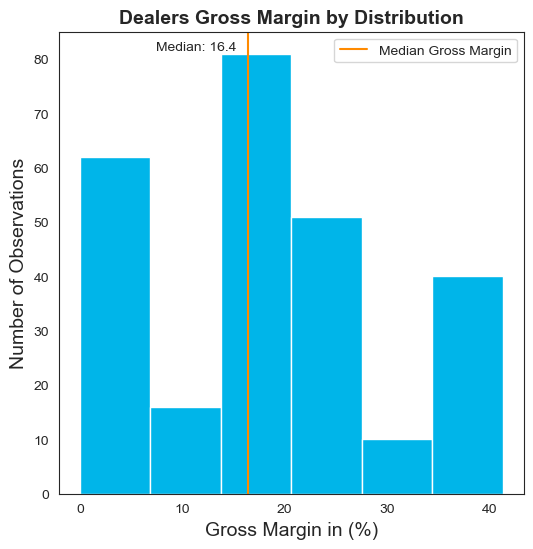

In [88]:
#Calculate median
median_GrossMargin = np.median(D4Clean2['Gross_Margin'])

#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D4Clean2['Gross_Margin'], 
         bins = 6,
        color = "#00B5E9")
plt.title('Dealers Gross Margin by Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Gross Margin in (%)", fontsize = 14)
plt.ylabel("Number of Observations",fontsize = 14 )

ax.axvline(median_GrossMargin, color='#FF8A00', label="Median Gross Margin")
ax.legend()

plt.annotate('Median: 16.4', xy=(20, 1),  xycoords='data',
            xytext=(0.21, 0.96), textcoords='axes fraction')
plt.show()

In [89]:
round(D4Clean2['Cost_Goods'].describe())

count         260.0
mean      2556159.0
std       6933240.0
min             0.0
25%         17023.0
50%        277047.0
75%       1745891.0
max      47614062.0
Name: Cost_Goods, dtype: float64

In [90]:
np.median(D4Clean2['Cost_Goods'])

277047.0

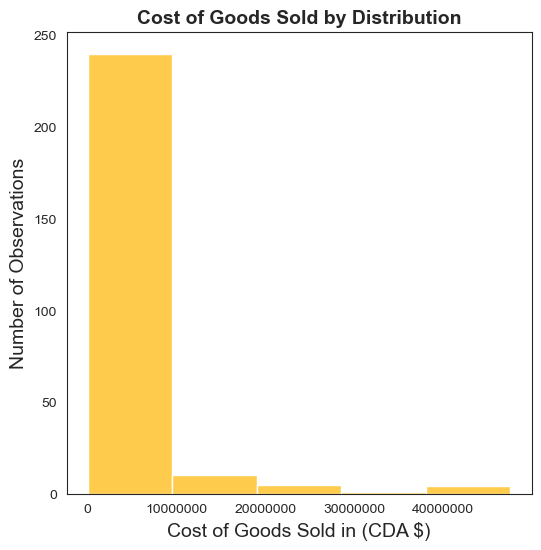

In [91]:
#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D4Clean2['Cost_Goods'], 
         bins = 5, 
        color = "#FECB4C")
plt.title('Cost of Goods Sold by Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Cost of Goods Sold in (CDA $)" , fontsize = 14)
plt.ylabel("Number of Observations" , fontsize = 14)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%.0f'%x))

plt.show()

Relationship between Closing Inventory and Opening Inventory

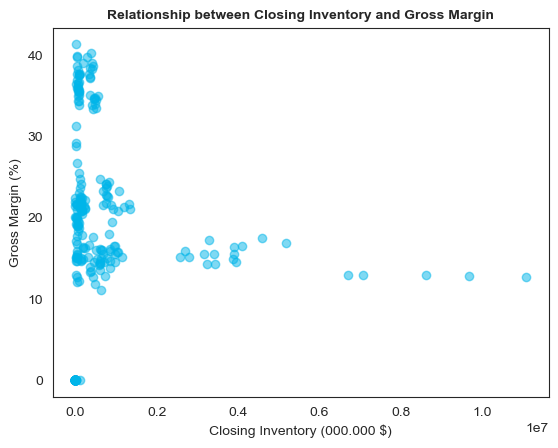

In [92]:
scatter = plt.scatter(D4Clean2['Closing_Inventory'],
           D4Clean2['Gross_Margin'],
           alpha = 0.5,
                     color = '#00B5E9')
plt.title("Relationship between Closing Inventory and Gross Margin",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Closing Inventory (000.000 $)")
plt.ylabel("Gross Margin (%)")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%.0f'%x))
plt.show()

In [93]:
#Calculate Correlation Coefficient
np.corrcoef(D4Clean2['Closing_Inventory'], D4Clean2['Gross_Margin'])

array([[ 1.        , -0.00558723],
       [-0.00558723,  1.        ]])

## D5- Population estimates

In [94]:
#Import data
D5 = pd.read_csv('D5- Population estimates.csv')

In [95]:
#Check first records
D5.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two columns for easy analysis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [96]:
#Split the Ref Date in two columns
D5split = pd.DataFrame(D5.REF_DATE.str.split('-',1).tolist(), columns = ['Year','Month',])

#Join the result in the original data set
D5join = D5split.join(D5)

#Drop the column 
D5drop = D5join.drop(columns=['REF_DATE', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Change data type of year
D5drop['Year'].astype('int32').dtypes

#Remove unnecessary rows
D5Clean = D5drop[(D5drop['Year'] >= '2015') & (D5drop['Year'] <= '2019') & (D5drop['GEO'] != 'Canada')]

In [97]:
#Check first records of the clean data
D5Clean.tail()

,Year,Month,GEO,VALUE
3694,2019,10,Alberta,4384982
3695,2019,10,British Columbia,5130251
3696,2019,10,Yukon,41648
3697,2019,10,Northwest Territories,45189
3698,2019,10,Nunavut,38625


In [98]:
D5Clean.shape

(260, 4)

### Checking data types and missing data

In [99]:
#Change data type of year
D5Clean['VALUE'].astype('int32').dtypes

dtype('int32')

In [100]:
#Check data type
D5Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 3420 to 3698
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    260 non-null    object
 1   Month   260 non-null    object
 2   GEO     260 non-null    object
 3   VALUE   260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


In [101]:
#Check missing data
D5Clean.isnull().sum()

Year     0
Month    0
GEO      0
VALUE    0
dtype: int64

For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary.

### Analyzing Numeric Variable

In [102]:
#Analysis of population variable
round(D5Clean['VALUE'].describe())

count         260.0
mean      2811822.0
std       4044374.0
min         36219.0
25%        145638.0
50%        948746.0
75%       4303122.0
max      14638247.0
Name: VALUE, dtype: float64

This data set shows population records between a minimum of 36,219 inhabitants and a maximum of 14,638,247 inhabitants.

In [103]:
#Average population by year
avg_pop = D5Clean.groupby('Year').agg({'VALUE':'mean'}).reset_index().astype('int')
avg_pop


,Year,VALUE
0,2015,2744466
1,2016,2773262
2,2017,2807280
3,2018,2846390
4,2019,2887707


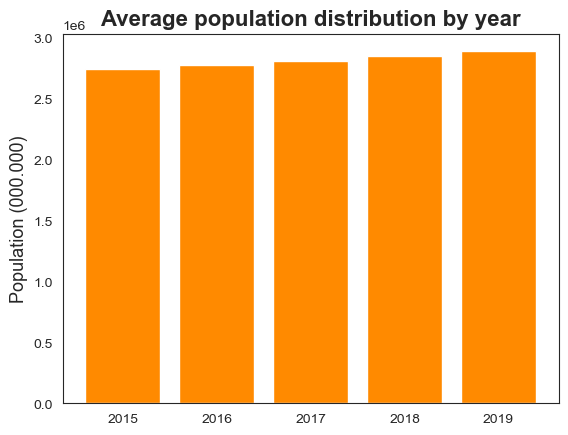

In [104]:
plt.bar(x= avg_pop["Year"],
       height = avg_pop["VALUE"],
       color = "#FF8A00")

plt.title("Average population distribution by year", fontsize = 16, fontweight = 'bold')
plt.ylabel("Population (000.000)", fontsize = 13)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: ('%.1f')%(x*1e9)))
plt.show()

### Analyzing Categorical Variables

#### GEO Column 

This column represents the provinces of Canada. This variable has 260 observations with 13 uniques values

In [105]:
D5Clean['GEO'].describe()

count                           260
unique                           13
top       Newfoundland and Labrador
freq                             20
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [106]:
D5Clean.GEO.value_counts()

Newfoundland and Labrador    20
Prince Edward Island         20
Nova Scotia                  20
New Brunswick                20
Quebec                       20
Ontario                      20
Manitoba                     20
Saskatchewan                 20
Alberta                      20
British Columbia             20
Yukon                        20
Northwest Territories        20
Nunavut                      20
Name: GEO, dtype: int64

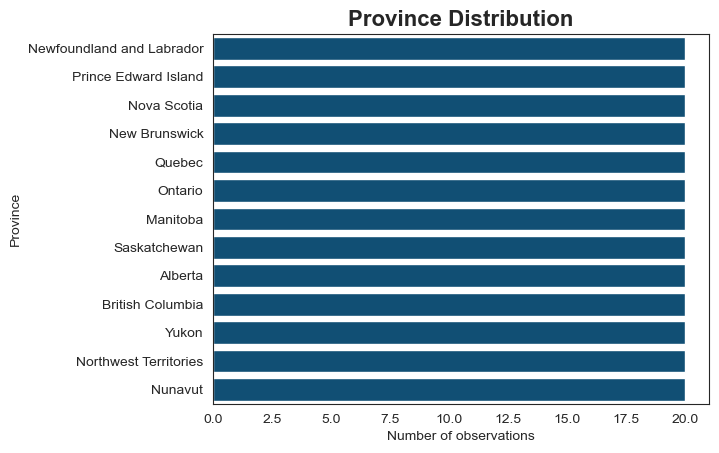

In [107]:
sns.countplot(data=D5Clean, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

# Data Transformation

#### Transformation 1

In [108]:
#Group by year and Province (GEO) and calculate the average of pupulation 
D5Final = D5Clean.groupby(['Year','GEO']).agg({'VALUE': 'mean'}).reset_index()
D5Final

,Year,GEO,VALUE
0,2015,Alberta,4137089.25
1,2015,British Columbia,4770642.50
2,2015,Manitoba,1291025.75
3,2015,New Brunswick,759296.25
4,2015,Newfoundland and Labrador,528309.25
...,...,...,...
60,2019,Ontario,14519330.50
61,2019,Prince Edward Island,156841.75
62,2019,Quebec,8490003.75
63,2019,Saskatchewan,1171687.50


In [109]:
D1Clean4=D1Clean3.reset_index()

In [110]:
#Replace the label of rows 
D1Clean5=D1Clean4.replace('British Columbia and the Territories', 'British Columbia')
D1Clean5

,New_ID,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price
0,1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0
1,5,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0,24.0
2,9,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0,24.0
3,10,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0,27.0
4,11,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0,27.0
...,...,...,...,...,...,...,...,...,...
2059,2396,2019,12,Alberta,Trucks,North America,578998.0,10443.0,55.0
2060,2397,2019,12,British Columbia,Passenger cars,North America,86162.0,2064.0,42.0
2061,2398,2019,12,British Columbia,Passenger cars,Japan,9605.0,302.0,32.0
2062,2399,2019,12,British Columbia,Passenger cars,Other countries,43442.0,828.0,52.0


In [111]:
#Merge the data set 1 with data set 5
mergedf = pd.merge(D1Clean5,D5Final,how='inner',on=['Year','GEO'])

In [112]:
#Change the name of column value for population
finaldf = mergedf.rename(columns={'VALUE':'Population'})

In [113]:
finaldf.head()

,New_ID,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price,Population
0,1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0,528309.25
1,41,2015,02,Newfoundland and Labrador,Passenger cars,North America,8004.0,326.0,25.0,528309.25
2,81,2015,03,Newfoundland and Labrador,Passenger cars,North America,12780.0,553.0,23.0,528309.25
3,121,2015,04,Newfoundland and Labrador,Passenger cars,North America,30273.0,1259.0,24.0,528309.25
4,161,2015,05,Newfoundland and Labrador,Passenger cars,North America,27945.0,1171.0,24.0,528309.25


In [114]:
#Calculate the population in thousand 
finaldf['Population in 1000'] = finaldf['Population'] / 1000

In [115]:
#Create a new column and calculate the sales per capita in thousand
finaldf['Sales per capita'] = finaldf['Sales'] / finaldf['Population in 1000']
finaldf.head()

,New_ID,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price,Population,Population in 1000,Sales per capita
0,1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0,528309.25,528.30925,12.818250
1,41,2015,02,Newfoundland and Labrador,Passenger cars,North America,8004.0,326.0,25.0,528309.25,528.30925,15.150217
2,81,2015,03,Newfoundland and Labrador,Passenger cars,North America,12780.0,553.0,23.0,528309.25,528.30925,24.190377
3,121,2015,04,Newfoundland and Labrador,Passenger cars,North America,30273.0,1259.0,24.0,528309.25,528.30925,57.301666
4,161,2015,05,Newfoundland and Labrador,Passenger cars,North America,27945.0,1171.0,24.0,528309.25,528.30925,52.895156


In [116]:
#Round values to 2 decimals
finaldf = finaldf.round(decimals = 2)
finaldf.head()

,New_ID,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price,Population,Population in 1000,Sales per capita
0,1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0,528309.25,528.31,12.82
1,41,2015,02,Newfoundland and Labrador,Passenger cars,North America,8004.0,326.0,25.0,528309.25,528.31,15.15
2,81,2015,03,Newfoundland and Labrador,Passenger cars,North America,12780.0,553.0,23.0,528309.25,528.31,24.19
3,121,2015,04,Newfoundland and Labrador,Passenger cars,North America,30273.0,1259.0,24.0,528309.25,528.31,57.30
4,161,2015,05,Newfoundland and Labrador,Passenger cars,North America,27945.0,1171.0,24.0,528309.25,528.31,52.90


In [117]:
#Create new df for seasons 
LSeason = {'Month': ['01', '02', '03','04','05','06','07','08','09','10','11','12'], 
          'Season': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer','Summer','Fall', 'Fall', 'Fall', 'Winter' ]}
Season = pd.DataFrame(data=LSeason)
Season

,Month,Season
0,01,Winter
1,02,Winter
2,03,Spring
3,04,Spring
4,05,Spring
5,06,Summer
6,07,Summer
7,08,Summer
8,09,Fall
9,10,Fall


In [118]:
#Add to the final table the season based on month
T1Final = pd.merge(finaldf,Season,how='inner',on=['Month'])
T1Final

,New_ID,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price,Population,Population in 1000,Sales per capita,Season
0,1,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0,528309.25,528.31,12.82,Winter
1,5,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0,24.0,144516.75,144.52,16.68,Winter
2,9,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0,24.0,937353.00,937.35,17.32,Winter
3,10,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0,27.0,937353.00,937.35,1.70,Winter
4,11,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0,27.0,937353.00,937.35,6.51,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2396,2019,12,Alberta,Trucks,North America,578998.0,10443.0,55.0,4355711.25,4355.71,132.93,Winter
2060,2397,2019,12,British Columbia,Passenger cars,North America,86162.0,2064.0,42.0,5084827.75,5084.83,16.94,Winter
2061,2398,2019,12,British Columbia,Passenger cars,Japan,9605.0,302.0,32.0,5084827.75,5084.83,1.89,Winter
2062,2399,2019,12,British Columbia,Passenger cars,Other countries,43442.0,828.0,52.0,5084827.75,5084.83,8.54,Winter


#### Transformation 2

In [119]:
# Rename column name REF_DATE to Year
D3t = D3Clean1.rename(columns={"REF_DATE": "Year"})

In [120]:
# Add column - Total Electric Cars
D3t['Total Electric Cars'] = D3t['Hybrid_electric'] + D3t['Battery_electric'] + D3t['Plug_in_hybrid_electric']

In [121]:
# Add column - Total Regitered Cars
D3t['Total Regitered Cars'] = D3t['Gasoline'] + D3t['Diesel'] + D3t['Total Electric Cars'] + D3t['Other_fuel_types']
D3t

,Year,GEO,Vehicle type,Gasoline,Diesel,Hybrid_electric,Battery_electric,Plug_in_hybrid_electric,Other_fuel_types,Total Electric Cars,Total Regitered Cars
New_ID,,,,,,,,,,,
5,2012,Prince Edward Island,Passenger cars,3422.0,49.0,113.0,2.0,1.0,0.0,116.0,3587.0
6,2012,Prince Edward Island,Pickup trucks,1096.0,39.0,0.0,0.0,0.0,0.0,0.0,1135.0
7,2012,Prince Edward Island,Multi-purpose vehicles,1998.0,8.0,7.0,0.0,0.0,0.0,7.0,2013.0
8,2012,Prince Edward Island,Vans,440.0,6.0,0.0,0.0,0.0,0.0,0.0,446.0
13,2012,New Brunswick,Passenger cars,17719.0,311.0,372.0,1.0,7.0,0.0,380.0,18410.0
...,...,...,...,...,...,...,...,...,...,...,...
312,2019,Saskatchewan,Vans,2308.0,56.0,0.0,0.0,4.0,0.0,4.0,2368.0
317,2019,British Columbia and the Territories,Passenger cars,43835.0,61.0,3970.0,9864.0,2712.0,20.0,16546.0,60462.0
318,2019,British Columbia and the Territories,Pickup trucks,36347.0,9215.0,0.0,0.0,0.0,0.0,0.0,45562.0


In [122]:
D5Final['Year'] = D5Final['Year'].astype(int)   # converted year to int32

In [123]:
# Merge D3 and D5
merged_d3_d5 = pd.merge(D3t,D5Final,how='inner',on=['Year','GEO'])     # D3t['Year'] is int64
merged_d3_d5

,Year,GEO,Vehicle type,Gasoline,Diesel,Hybrid_electric,Battery_electric,Plug_in_hybrid_electric,Other_fuel_types,Total Electric Cars,Total Regitered Cars,VALUE
0,2015,Prince Edward Island,Passenger cars,3395.0,31.0,37.0,0.0,0.0,0.0,37.0,3463.0,144516.75
1,2015,Prince Edward Island,Pickup trucks,1278.0,124.0,0.0,0.0,0.0,0.0,0.0,1402.0,144516.75
2,2015,Prince Edward Island,Multi-purpose vehicles,2821.0,15.0,1.0,0.0,0.0,0.0,1.0,2837.0,144516.75
3,2015,Prince Edward Island,Vans,395.0,10.0,0.0,0.0,0.0,0.0,0.0,405.0,144516.75
4,2015,New Brunswick,Passenger cars,15261.0,256.0,188.0,4.0,3.0,0.0,195.0,15712.0,759296.25
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019,Manitoba,Vans,2685.0,68.0,0.0,0.0,9.0,1.0,9.0,2763.0,1367630.50
116,2019,Saskatchewan,Passenger cars,5899.0,27.0,213.0,83.0,37.0,0.0,333.0,6259.0,1171687.50
117,2019,Saskatchewan,Pickup trucks,15538.0,2903.0,0.0,0.0,0.0,0.0,0.0,18441.0,1171687.50
118,2019,Saskatchewan,Multi-purpose vehicles,21882.0,78.0,239.0,22.0,39.0,0.0,300.0,22260.0,1171687.50


In [124]:
merged_3_5 = merged_d3_d5.rename(columns={"VALUE": "Population"})

In [125]:
merged_3_5['T. Elect.cars per 100.000 inhabitants'] = (merged_3_5['Total Electric Cars'] / merged_3_5['Population']) * 100000

In [126]:
merged_3_5['T. Registered per 100.000 inhabitants'] = (merged_3_5['Total Regitered Cars'] / merged_3_5['Population']) * 100000

In [127]:
#Create new df rebate_df (coulmns -GEO and Rebate)
rebate = {'GEO': ['British Columbia and the Territories', 'Quebec', 'Ontario', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island', 'Newfoundland and Labrador', 'Yukon', 'Manitoba', 'Saskatchewan', 'Alberta'], 
          'Rebate': [3000, 8000, 2000, 5000, 3000, 5000, 2500, 5000, 0, 0, 0]}
rebate_df = pd.DataFrame(data=rebate)
rebate_df

,GEO,Rebate
0,British Columbia and the Territories,3000
1,Quebec,8000
2,Ontario,2000
3,New Brunswick,5000
4,Nova Scotia,3000
5,Prince Edward Island,5000
6,Newfoundland and Labrador,2500
7,Yukon,5000
8,Manitoba,0
9,Saskatchewan,0


In [128]:
T2Final = pd.merge(merged_3_5,rebate_df,how='inner',on=['GEO']).round()
T2Final

,Year,GEO,Vehicle type,Gasoline,Diesel,Hybrid_electric,Battery_electric,Plug_in_hybrid_electric,Other_fuel_types,Total Electric Cars,Total Regitered Cars,Population,T. Elect.cars per 100.000 inhabitants,T. Registered per 100.000 inhabitants,Rebate
0,2015,Prince Edward Island,Passenger cars,3395.0,31.0,37.0,0.0,0.0,0.0,37.0,3463.0,144517.0,26.0,2396.0,5000
1,2015,Prince Edward Island,Pickup trucks,1278.0,124.0,0.0,0.0,0.0,0.0,0.0,1402.0,144517.0,0.0,970.0,5000
2,2015,Prince Edward Island,Multi-purpose vehicles,2821.0,15.0,1.0,0.0,0.0,0.0,1.0,2837.0,144517.0,1.0,1963.0,5000
3,2015,Prince Edward Island,Vans,395.0,10.0,0.0,0.0,0.0,0.0,0.0,405.0,144517.0,0.0,280.0,5000
4,2016,Prince Edward Island,Passenger cars,3038.0,3.0,37.0,3.0,3.0,0.0,43.0,3084.0,146473.0,29.0,2106.0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2018,Saskatchewan,Vans,2323.0,80.0,0.0,0.0,6.0,0.0,6.0,2409.0,1160702.0,1.0,208.0,0
116,2019,Saskatchewan,Passenger cars,5899.0,27.0,213.0,83.0,37.0,0.0,333.0,6259.0,1171688.0,28.0,534.0,0
117,2019,Saskatchewan,Pickup trucks,15538.0,2903.0,0.0,0.0,0.0,0.0,0.0,18441.0,1171688.0,0.0,1574.0,0
118,2019,Saskatchewan,Multi-purpose vehicles,21882.0,78.0,239.0,22.0,39.0,0.0,300.0,22260.0,1171688.0,26.0,1900.0,0


#### Transformation 3

In [129]:
#Checking the first 5 rows of the dataset
D4Clean2.head()

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
New_ID,,,,,,,,,,,,,
1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#Resetting the index
D4Clean3 = D4Clean2.reset_index()
D4Clean3

,New_ID,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#Renaming the variable 'REF_DATE'
D4Final = D4Clean3.rename(columns={'REF_DATE':'Year'})
D4Final

,New_ID,Year,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#Adding a new Variable 'Inventory Turnover'
D4Final['Inventory Turnover'] = D4Final['Cost_Goods'] / ((D4Final['Opening_Inventory']+D4Final['Closing_Inventory'])/2)
D4Final

,New_ID,Year,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses,Inventory Turnover
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0,4.431375
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0,4.496182
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0,2.055144
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0,2.578220
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0,inf
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [133]:
#Adding a new Variable 'Inventory Turnover in Days'
D4Final['Inventory Turnover in Days'] = 365/ D4Final['Inventory Turnover']
D4Final

,New_ID,Year,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses,Inventory Turnover,Inventory Turnover in Days
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0,4.431375,82.367216
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0,4.496182,81.179988
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0,2.055144,177.603100
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0,2.578220,141.570560
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0,inf,0.000000
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [134]:
#Changing the data type of Variable 'Year'
D4Final['Year'] = D4Final['Year'].apply(int)

In [135]:
#Merging Dataset 4 and Dataset 5
D4D5 = pd.merge(D4Final,D5Final,how='inner',on=['Year','GEO'])
D4D5

,New_ID,Year,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses,Inventory Turnover,Inventory Turnover in Days,VALUE
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0,4.431375,82.367216,528309.25
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0,4.496182,81.179988,528309.25
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0,2.055144,177.603100,528309.25
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0,2.578220,141.570560,528309.25
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,144516.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0,inf,0.000000,45149.50
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50


In [136]:
#Renaming Variable 'Value'
D4D5 = D4D5.rename(columns={'VALUE':'Population'})

In [137]:
#Converting 'Population' to 'Popuplation in 1000' for easy computation of 'Sales per Capital'
D4D5['Population in 1000'] = D4D5['Population']/1000

In [138]:
#Adding a new Variable 'Sales per Capital'
D4D5['Sales per Capital'] = D4D5['Sales_Goods'] / D4D5['Population in 1000']

In [139]:
#Rounding up Variables to 2 decimal places
FinalT3 = D4D5.round(decimals = 2)
FinalT3

,New_ID,Year,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses,Inventory Turnover,Inventory Turnover in Days,Population,Population in 1000,Sales per Capital
0,1,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0,4.43,82.37,528309.25,528.31,3322.67
1,2,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0,4.50,81.18,528309.25,528.31,266.78
2,3,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0,2.06,177.60,528309.25,528.31,574.39
3,4,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0,2.58,141.57,528309.25,528.31,303.54
4,5,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,144516.75,144.52,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0,inf,0.00,45149.50,45.15,414.18
256,257,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50,38.52,0.00
257,258,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50,38.52,0.00
258,259,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,38522.50,38.52,0.00


# Data Analysis

### Q1. Which province/geographical region generates the highest revenue yearly? Which province has the highest sales per capita? 

In [140]:
# Province with more sales by year
Q1a = T1Final[['Year','GEO','Sales']]
Sales_yearly_location = Q1a.groupby(['Year','GEO']).sum().reset_index()
Sales_yearly_location_maximum = Sales_yearly_location.groupby(['Year']).max().reset_index()
Sales_yearly_location_maximum = Sales_yearly_location_maximum[['Year','Sales']]
pd.merge(Sales_yearly_location,Sales_yearly_location_maximum,how='inner',on=['Sales','Year'])

,Year,GEO,Sales
0,2015,Ontario,25358946.0
1,2016,Ontario,27788919.0
2,2017,Ontario,30174166.0
3,2018,Ontario,31344645.0
4,2019,Ontario,31487495.0


In [141]:
# Province with more sales per capita by year
Q1b = T1Final[['Year','GEO','Sales per capita']]
Sales_yearly_location_per_capita = Q1b.groupby(['Year','GEO']).sum().reset_index()
Sales_yearly_location_maximum_percap = Sales_yearly_location_per_capita.groupby(['Year']).max().reset_index()
Sales_yearly_location_maximum_percap = Sales_yearly_location_maximum_percap[['Year','Sales per capita']]
pd.merge(Sales_yearly_location_per_capita,Sales_yearly_location_maximum_percap,how='inner',on=['Sales per capita','Year'])

,Year,GEO,Sales per capita
0,2015,Alberta,2183.36
1,2016,Alberta,2035.12
2,2017,Alberta,2351.34
3,2018,Alberta,2311.92
4,2019,Alberta,2171.03


In all the years the city that generated the most sales was Ontario, but, the province that generated the most sales per carp was Alberta.

In [142]:
#Visualization
Q1c = T1Final[['Year','GEO','Sales','Sales per capita']]
Year_loc_sales = Q1c.groupby(['Year','GEO']).sum().reset_index()
Location_sales_percap = Year_loc_sales.groupby(['GEO']).mean().reset_index()
Location_sales_percap

,GEO,Sales,Sales per capita
0,Alberta,9379459.2,2210.554
1,British Columbia,8113820.4,1646.166
2,Manitoba,2289517.0,1719.456
3,New Brunswick,1416714.8,1847.042
4,Newfoundland and Labrador,649141.6,1232.636
5,Nova Scotia,1672748.6,1758.926
6,Ontario,29230834.2,2073.678
7,Prince Edward Island,167944.8,1105.032
8,Quebec,14330333.2,1723.166
9,Saskatchewan,2132831.0,1859.646


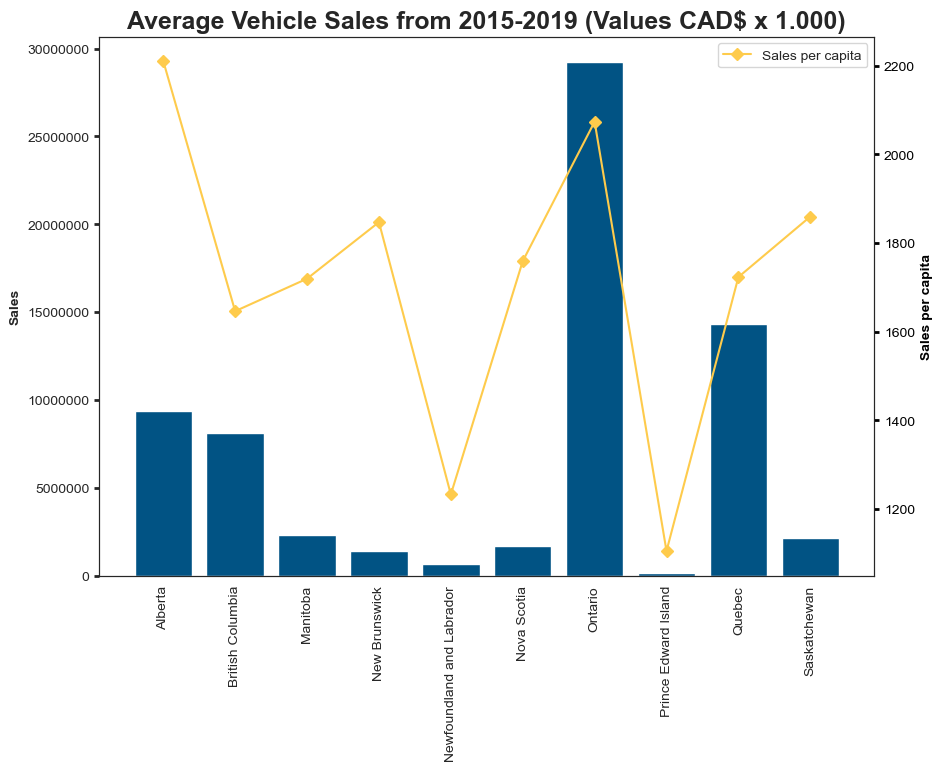

In [143]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(Location_sales_percap["GEO"],
       Location_sales_percap["Sales"],
       color = "#015384")
ax.set_ylabel("Sales",
              weight = 'bold')
ax.tick_params(axis = 'y',
               width = 2,
               labelsize = 'medium')
ax.tick_params(axis = 'x',
               rotation = 90)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax1 = ax.twinx() #Instantiate a second axes that shares the same x-axis

ax1.plot(Location_sales_percap["GEO"],
         Location_sales_percap["Sales per capita"],
         color = "#FECB4C",
         marker = "D")
ax1.set_ylabel("Sales per capita",
               color = 'black',
               weight = 'bold')
ax1.tick_params(axis = 'y',
                colors = 'black',
                width = 2,
                labelsize = 'medium')
ax.set_title("Average Vehicle Sales from 2015-2019 (Values CAD$ x 1.000)", fontsize = '18', weight = 'bold' )
plt.legend(['Sales per capita'])


plt.show()

In the plot it can be seen that the provinces with the lowest total sales tend to have more sales per capita. Alberta is not the province with the most total sales, but it is the province with the most sales per capita.

### Q2. Does the sale price by unit tend to be constant, or does it show significant variations from one year to the other, or from one province to another?

In [144]:
#Averegae pice by year
unit_price_yearly = T1Final.groupby('Year').agg({'Unit_price':'mean'}).reset_index().astype('int')
unit_price_yearly

,Year,Unit_price
0,2015,33
1,2016,34
2,2017,35
3,2018,36
4,2019,37


In [145]:
#Average price by province
unit_price_province_wise = T1Final.groupby('GEO').agg({'Unit_price':'mean'}).reset_index()
unit_price_province_wise = unit_price_province_wise.round(decimals=2)
unit_price_province_wise

,GEO,Unit_price
0,Alberta,38.55
1,British Columbia,38.95
2,Manitoba,35.75
3,New Brunswick,32.86
4,Newfoundland and Labrador,30.96
5,Nova Scotia,31.33
6,Ontario,37.39
7,Prince Edward Island,30.92
8,Quebec,33.83
9,Saskatchewan,36.92


According with the above outpust, it can be seen that the price has increased year by year. On the other hand, the three province with highest unit price are British Columbia, Alberta and Ontario, and the three province with the lowest unit price are Nova Scotia, Newfoundland and Labrador and Prince Edward Island

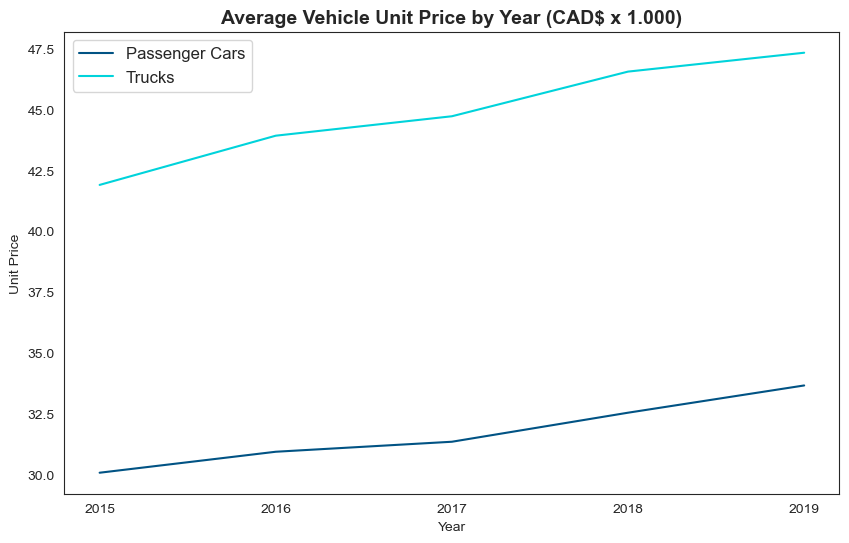

In [165]:
#Visualization Average Vehicle Price by Year
Q2a = T1Final.groupby(['Year', 'Vehicle type'])\
.agg({'Unit_price':'mean'})\
.reset_index()\
.pivot(index='Year', columns = 'Vehicle type', values = 'Unit_price')\
.reset_index()

plt.figure(figsize = (10,6))

plt.plot(Q2a["Year"], Q2a["Passenger cars"], color = '#015384')
plt.plot(Q2a["Year"], Q2a["Trucks"], color = '#00D3DB')
plt.title("Average Vehicle Unit Price by Year (CAD$ x 1.000)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Unit Price")
plt.xlabel("Year")
plt.legend(labels = labels, fontsize = 'large')
labels = ['Passenger Cars', 'Trucks']
plt.show()

In [147]:
T1Final.groupby(['Year', 'Vehicle type'])\
.agg({'Unit_price':'mean'})\
.reset_index()\
.pivot(index='Year', columns = 'Vehicle type', values = 'Unit_price')\
.reset_index()

Vehicle type,Year,Passenger cars,Trucks
0,2015,30.090278,41.906250
1,2016,30.951389,43.927083
2,2017,31.362179,44.725000
3,2018,32.554487,46.558333
4,2019,33.673077,47.333333


It can be seen from the above plot that Unit Price and Year are having a positive linear relationship. The type "Trucks" have more Unit price from the start but the "Passenger Cars" unit prices are also increasing gradually and trying to catch up.

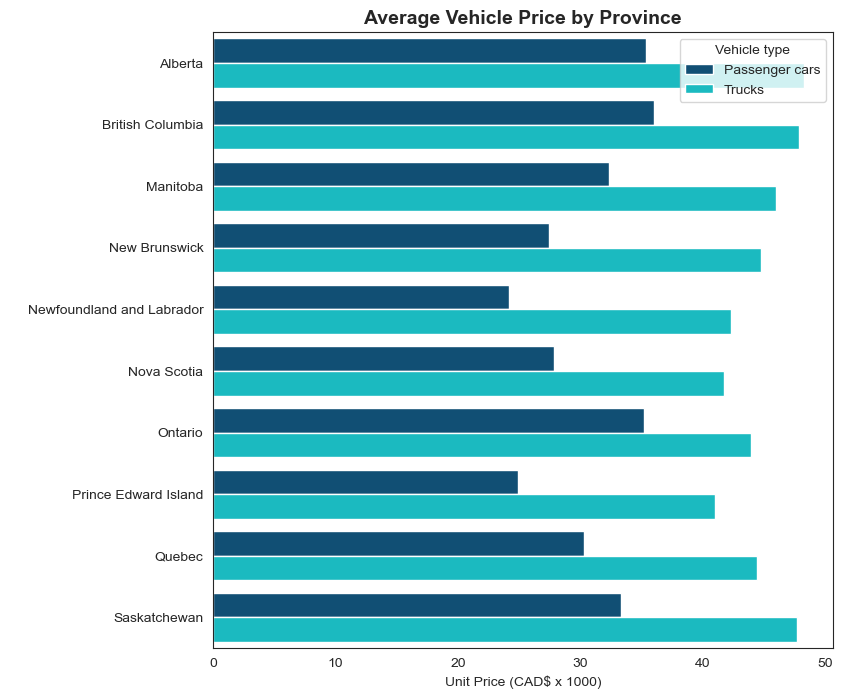

In [148]:
#Visualization Average Vehicle Price by Province
Q2b = T1Final.groupby(['GEO', 'Vehicle type'])\
.agg({'Unit_price':'mean'})\
.reset_index()

colors = ["#015384", "#00D3DB"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8, 8))
sns.barplot(y="GEO", x="Unit_price", hue="Vehicle type", data=Q2b)
plt.title("Average Vehicle Price by Province", fontsize = 14, fontweight = 'bold')
plt.ylabel(" ")
plt.xlabel("Unit Price (CAD$ x 1000)")
plt.show()

It can be interpreted from the above plot that the provinces Saskatchewan and Alberta have almost equal unit price of trucks and highest as well. If we look at distribution of cars, Newfoundland and Labrodor has the least unit price whereas Alberta, British Colombia and Ontario have the highest unit price.

### Q3. Does the season of the year influence car sales in Canada? In which season of the year are more vehicles sold? 

In [149]:
sales_season_wise = T1Final.groupby(['Year', 'Season']).agg({'Sales':'sum'}).reset_index()


Q3 = sales_season_wise.groupby('Season').agg({'Sales':'mean'}).reset_index()
Q3

,Season,Sales
0,Fall,17345164.8
1,Spring,20234976.0
2,Summer,19093045.6
3,Winter,12710158.4


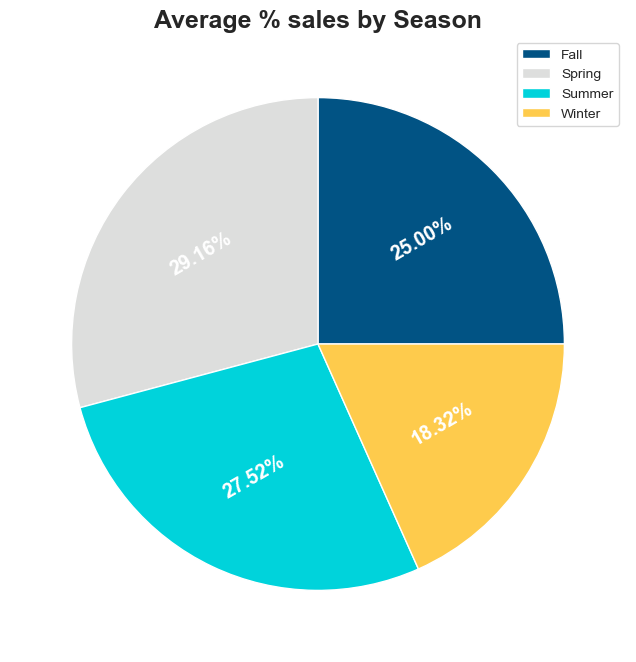

In [150]:
plt.figure(figsize = (10,8))

colors = ['#015384', '#DDDEDD', '#00D3DB', '#FECB4C']

plt.pie(Q3['Sales'], 
       labels = Q3['Season'].values,
       autopct = '%.2f%%',
        colors = colors,
       textprops = {'size' : 'x-large',
                   'fontweight': 'bold',
                   'rotation' : '30',
                   'color' : 'w'})
plt.legend()
plt.title('Average % sales by Season', fontsize = 18, fontweight = 'bold')
plt.show()

The Average sales percentage of vehicles tends to increase in the Spring season. On the other hand, the season having least sales percentage is Winter.

#### Q4. Which of the Provinces has the lowest new car inventory turnover?

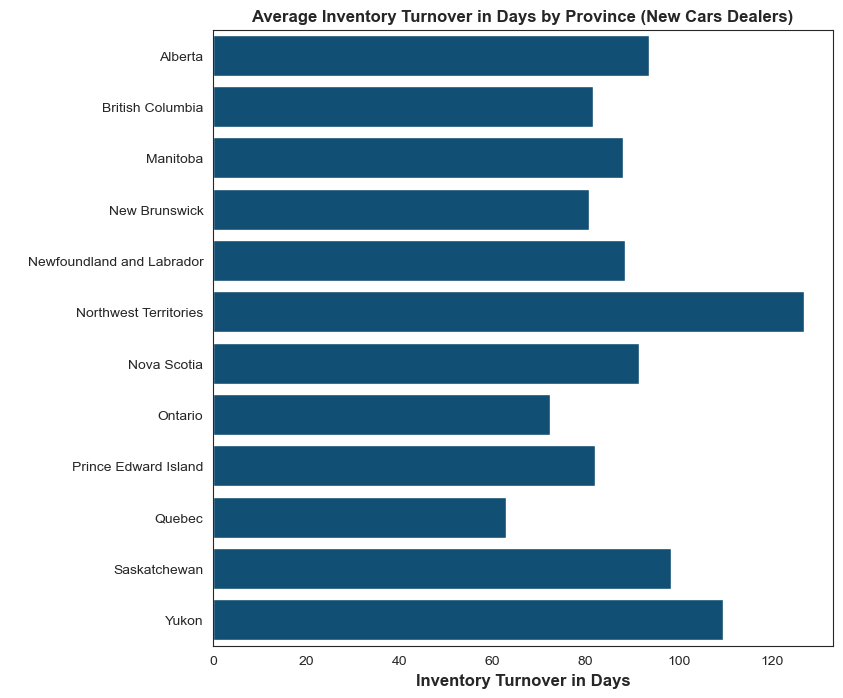

In [166]:
Q4 = FinalT3.groupby(['GEO', 'North American Industry Classification System (NAICS)'])\
.agg({'Inventory Turnover in Days':'mean'}).round(decimals=2).reset_index()
Q4 = Q10[(Q10['North American Industry Classification System (NAICS)'] == 'New car dealers [44111]') & (Q10['GEO'] != 'Nunavut')] 

colors = ["#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384", "#015384"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8, 8))
sns.barplot(y="GEO", x="Inventory Turnover in Days", data=Q4)
plt.title("Average Inventory Turnover in Days by Province (New Cars Dealers)", fontsize = 12, fontweight = 'bold')
plt.ylabel(" ")
plt.xlabel("Inventory Turnover in Days", fontsize = 12, fontweight = 'bold')
plt.show()

As presented above, it is evident that all the provinces have new car inventory turnover rate above 60 days which seems to be high and might translate to new car dealers loosing out on potential sales. However, Quebec happens to have the best inventory turnover while Northwest Territories have the worst inventory turnover of over 120 days.

#### Q5. Are those provinces that have a rebate policy the ones that sell the most electric cars per each 100.000 inhabitants?

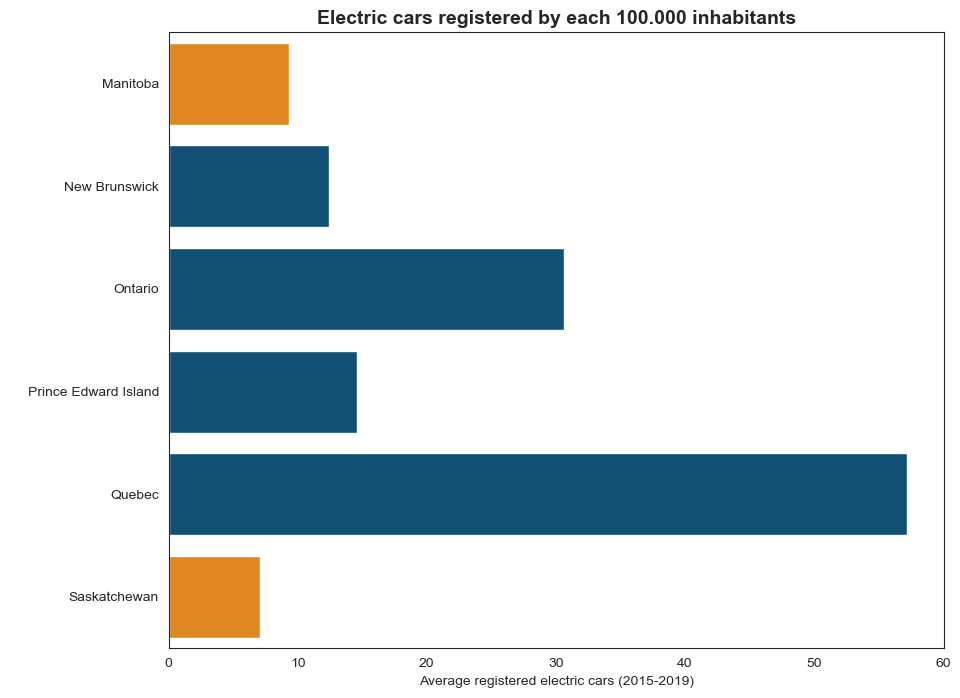

In [167]:
Q5 = T2Final.groupby('GEO').agg({'T. Elect.cars per 100.000 inhabitants':'mean'}).reset_index()

colors = ["#FF8A00", "#015384", "#015384", "#015384", "#015384", "#FF8A00" ]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 8))
sns.barplot(data=Q5, y="GEO", x="T. Elect.cars per 100.000 inhabitants")
#sns.barplot(data=Q6a, x="GEO", y="T. Elect.cars per 100.000 inhabitants")
plt.title("Electric cars registered by each 100.000 inhabitants", fontsize = 14, fontweight = 'bold')
plt.ylabel(" ")
plt.xlabel("Average registered electric cars (2015-2019)")
plt.show()

There are two provinces that, without having a Rabate policy, have an average registration of between 7 and 9 cars per year for every 100,000 inhabitants. While the provinces that have a Rabate policy tend to have a higher number of registrations per year for every 100,000 inhabitants, Quebec is the province that leads the list.

#### Q6. Does the value of the rebate offered by the provinces has an influence on the increase or decrease in the registration of electric cars?

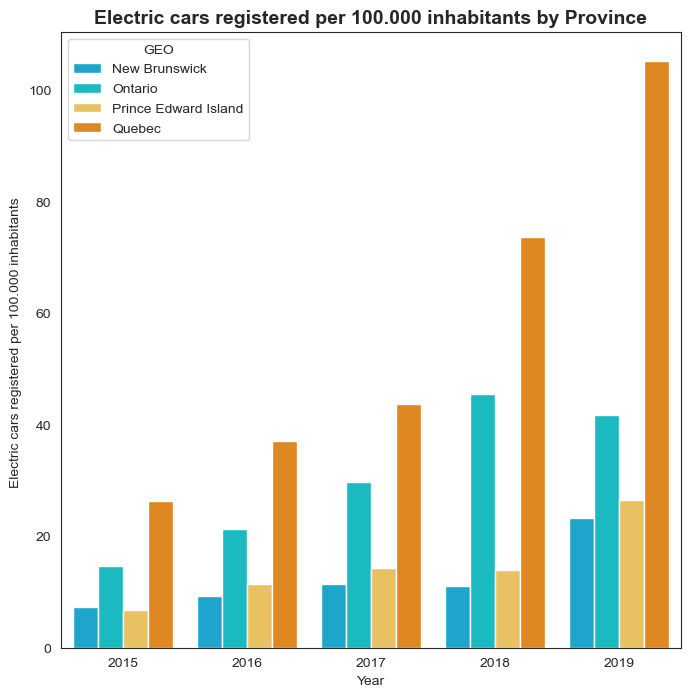

In [168]:
Q6 = T2Final.groupby(['Year', 'GEO']).agg({'T. Elect.cars per 100.000 inhabitants':'mean', 'Rebate':'mean'}).reset_index()
Q6.sort_values(["GEO", "Year"], ascending = (False, True))
Q6 = Q6[Q6['GEO'].isin(['Ontario', 'Quebec', 'New Brunswick', 'Prince Edward Island'])]

colors = ["#00B5E9", "#00D3DB", "#FECB4C", "#FF8A00"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8, 8))
sns.barplot(data=Q6, y="T. Elect.cars per 100.000 inhabitants", x="Year", hue="GEO")
plt.title("Electric cars registered per 100.000 inhabitants by Province", fontsize = 14, fontweight = 'bold')
plt.ylabel("Electric cars registered per 100.000 inhabitants ")
plt.xlabel("Year")
plt.show()

When comparing Quebec with Ontario, it is observed that Quebec has a significant growth in car registration per 100,000 inhabitants year after year which can be influenced by its high rebate policy. While Ontario, which is the province with the greatest number of inhabitants, has a much lower rebate policy, showing a slow increase, and even Ontario had a decrease in 2019 compared to 2018.

On the other hand, the provinces with rebate the $ 5,000, present an increase in the registration of electric cars per 100,000 inhabitants year after year

## Other analysis

#### How is the price of imported vehicles from Japan compared to vehicles manufactured in North America? Could the price of Japanese vehicles affect the manufacturing industry in Canada?

In [151]:
Q1 = T1Final[(T1Final['Vehicle type'] == 'Passenger cars')]
Q1a = Q1.groupby('Origin of manufacture').agg({'Unit_price':'mean'}).reset_index()
Q1a

,Origin of manufacture,Unit_price
0,Japan,31.085526
1,North America,26.956667
2,Other countries,38.769737


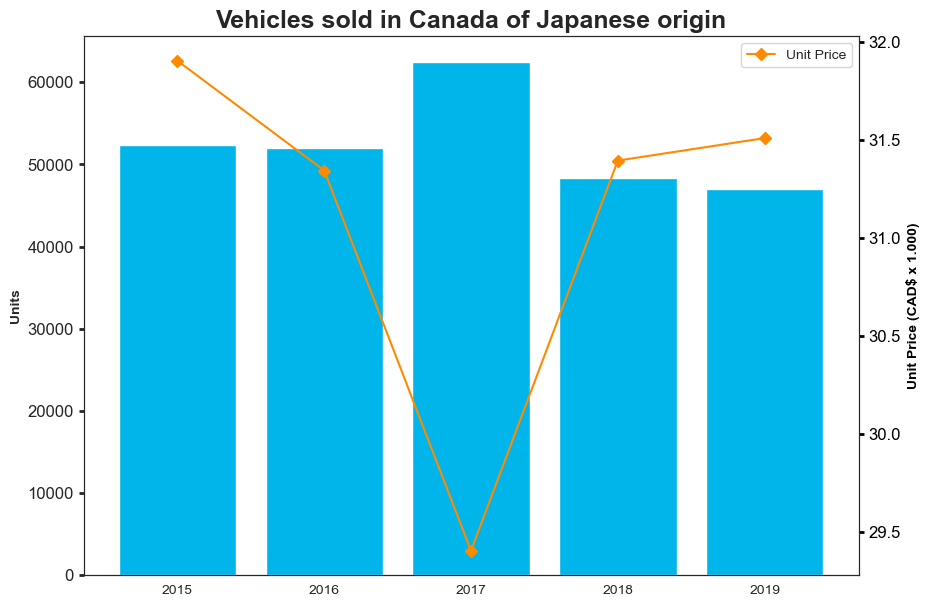

In [152]:
Q1b = T1Final[(T1Final['Origin of manufacture'] == 'Japan')]
Q1c = Q1b.groupby('Year').agg({'Unit_price':'mean', 'Units':'sum'}).reset_index()

sns.set_style("white")
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(Q1c["Year"],
       Q1c["Units"],
       color = "#00B5E9")
ax.set_ylabel("Units",
              weight = 'bold')
ax.tick_params(axis = 'y',
               width = 2,
               labelsize = 'large')

ax1 = ax.twinx() #Instantiate a second axes that shares the same x-axis

ax1.plot(Q1c["Year"],
         Q1c["Unit_price"],
         color = "#FF8A00",
         marker = "D")
ax1.set_ylabel("Unit Price (CAD$ x 1.000)",
               color = 'black',
               weight = 'bold')
ax1.tick_params(axis = 'y',
                colors = 'black',
                width = 2,
                labelsize = 'large')
ax.set_title("Vehicles sold in Canada of Japanese origin", fontsize = '18', weight = 'bold' )
plt.legend(['Unit Price'])

plt.show()

The vehicles sold by Japan have consistent Units from 2015 - 2017 but they fell down from 600 to 500 in the next consecutive years. Unit Price seems to be gradually falling from 2015 to 2016 and then approached the less than 30 mark drastically in 2017. But we can observe from the plot that Unit price of Vehicles had come back to normalcy in the years 2018 to 2019.

#### How many electric cars have been registered in Canada by province and by year?

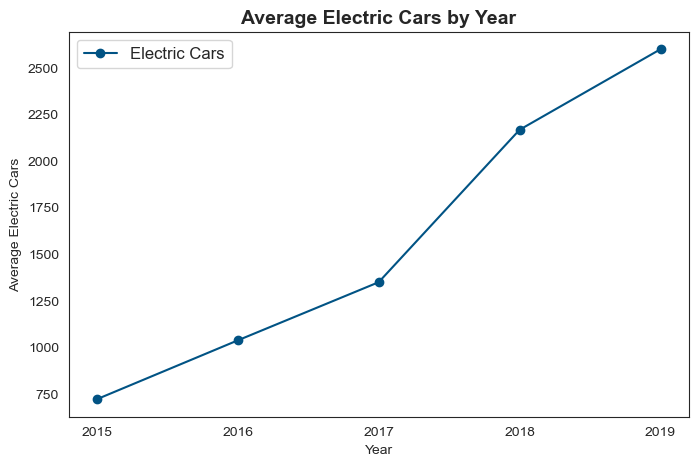

In [153]:
T2Final['Year'] = T2Final['Year'].apply(str)

Q5a = T2Final[['Year','GEO','Total Electric Cars']]
avg_electric_cars_yealry = Q5a.groupby(['Year']).mean().reset_index()

plt.figure(figsize = (8,5))

plt.plot(avg_electric_cars_yealry["Year"], avg_electric_cars_yealry["Total Electric Cars"], 
         color = '#015384', marker='o')
plt.title("Average Electric Cars by Year", fontsize = 14, fontweight = 'bold')
plt.ylabel("Average Electric Cars")
plt.xlabel("Year")
labels = ['Electric Cars']
plt.legend(labels = labels, fontsize = 'large')
plt.show()

It can be observed that the number of average electric cars registered in Canada has been increasing from 2015 to 2019.there is steep and consistent increase from the year 2015 to 2017 and from 2018 to 2019. It indicates increasing number of people interested in electric cars year by year.

In [154]:
Q5b = T2Final[['GEO','Total Electric Cars']]
avg_electric_cars_by_location = Q5b.groupby(['GEO']).mean().reset_index()
avg_electric_cars_by_location

,GEO,Total Electric Cars
0,Manitoba,126.10
1,New Brunswick,95.15
2,Ontario,4340.30
3,Prince Edward Island,22.15
4,Quebec,4777.25
5,Saskatchewan,81.80


####  How the retail sale is distributed by province and by year according to dealer classification?

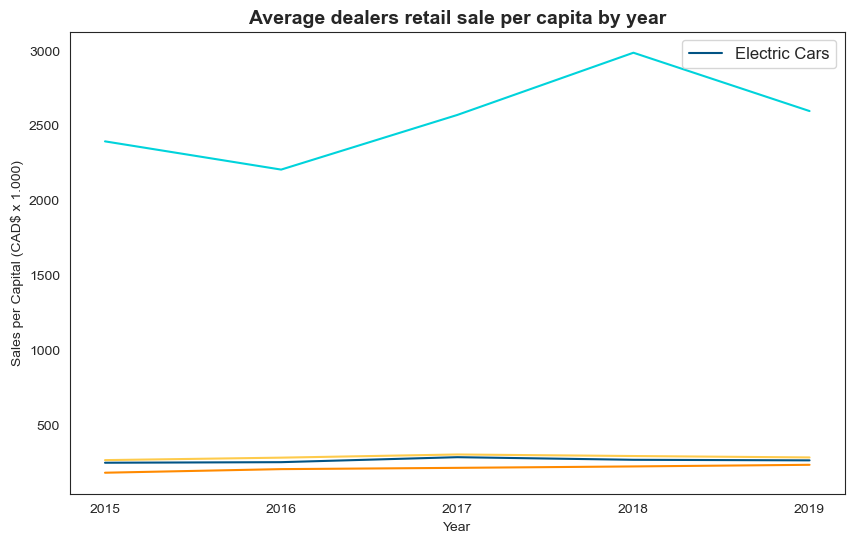

In [158]:
#Distribution dealer sales by year
Q8a = FinalT3.groupby(['Year', 'North American Industry Classification System (NAICS)'])\
.agg({'Sales per Capital':'mean'})\
.round(decimals=2).reset_index()\
.pivot(index='Year', columns = 'North American Industry Classification System (NAICS)', values = 'Sales per Capital')\
.reset_index()

Q8a['Year'] = Q8a['Year'].apply(str)

plt.figure(figsize = (10,6))
plt.plot(Q8a["Year"], Q8a["Automotive parts, accessories and tire stores [4413]"], color = '#015384')
plt.plot(Q8a["Year"], Q8a["New car dealers [44111]"], color = '#00D3DB')
plt.plot(Q8a["Year"], Q8a["Other motor vehicle dealers [4412]"], color = '#FECB4C')
plt.plot(Q8a["Year"], Q8a["Used car dealers [44112]"], color = '#FF8A00')
plt.title("Average dealers retail sale per capita by year", fontsize = 14, fontweight = 'bold')
plt.ylabel("Sales per Capital (CAD$ x 1.000)")
plt.xlabel("Year")
plt.legend(labels = labels, fontsize = 'large')
labels = ['Parts, accessories and tires dealers', 'New car dealers', 'Other motor vehicle dealers', 'Used car dealers' ]
plt.show()

As shown above, it is depicted that New car dealears has the highest retail sale per capital yearly. However, it could be observed that there was a decrease in sales of new cars in 2016 and a gradual of increase from 2016 to 2018 with a sudden decline in 2019. On the contrary, there's a consistent but low flow of used cars, other motor vehicle sales and automotive parts and accessories from 2015 to 2019. However, a slight change in automotive parts and accessories sales could be observed in 2017. A conclusion could be made that new cars are sold the most from year 2015 through 2019.

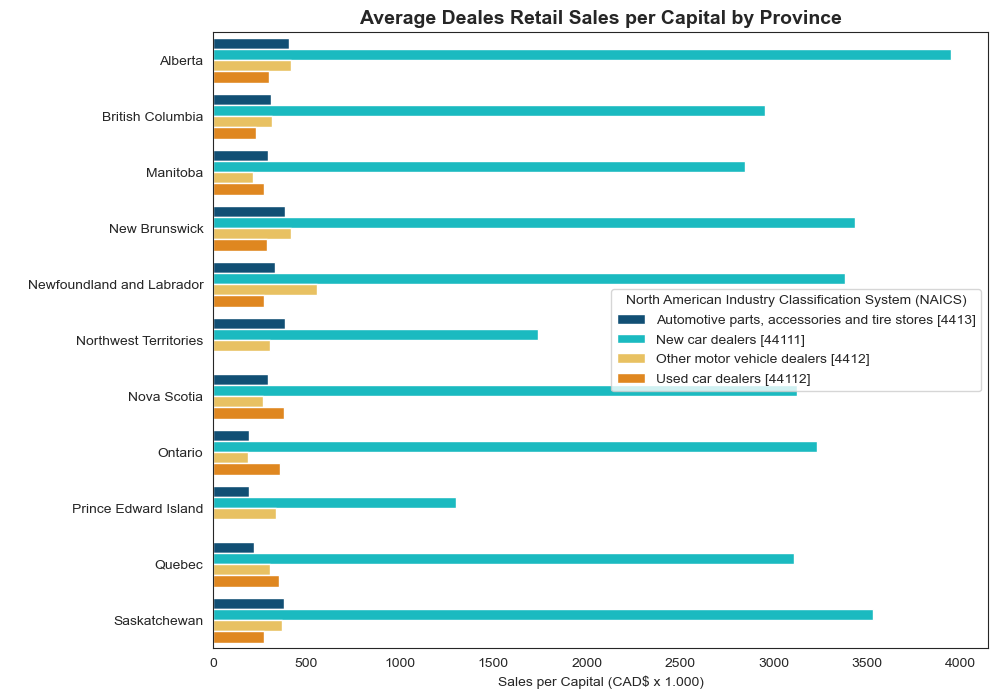

In [159]:
# Distribution dealer sales by Province
Q8b = FinalT3.groupby(['GEO', 'North American Industry Classification System (NAICS)'])\
.agg({'Sales per Capital':'mean'}).round(decimals=2).reset_index()
Q8b = Q8b[(Q8b['GEO'] != 'Nunavut') & (Q8b['GEO'] != 'Yukon')]

colors = ["#015384", "#00D3DB", "#FECB4C", "#FF8A00" ]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 8))
sns.barplot(y="GEO", x="Sales per Capital", hue="North American Industry Classification System (NAICS)", data=Q8b)
plt.title("Average Deales Retail Sales per Capital by Province", fontsize = 14, fontweight = 'bold')
plt.ylabel(" ")
plt.xlabel("Sales per Capital (CAD$ x 1.000)")
plt.show()

As shown above, it could be observed that New car dealers has the highest retail sale per capital across all the Provinces with Alberta having the lead in sales and Prince Edward Island having the lowest sales. On the contrary, the sales rate of used cars, other motor vehicle and automotive parts and accessories are very low across all Provinces. As such, it could be deduced that new cars are mostly sold in all the Provinces compared with other automobile categories.

#### In which province do the parts, accessories and tire dealers have the highest gross margin?

<Figure size 900x800 with 0 Axes>

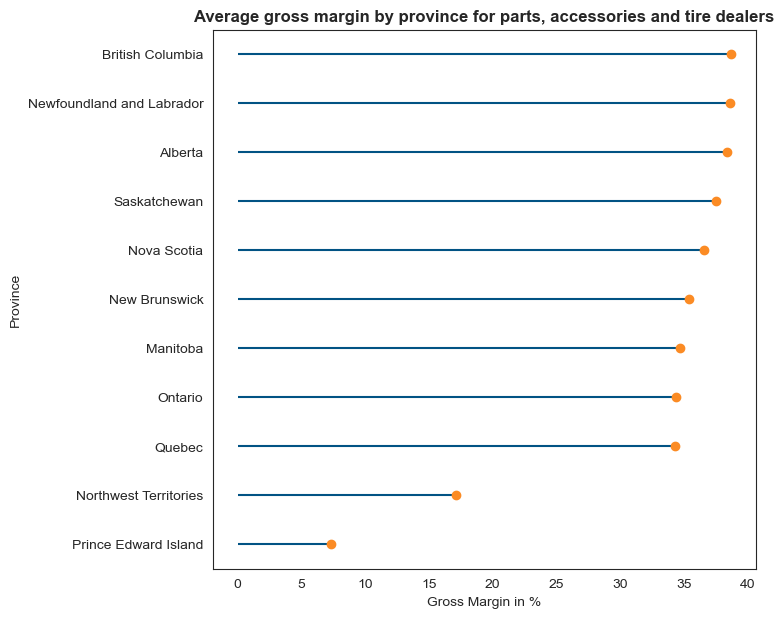

In [160]:
Q9 = FinalT3.groupby(['GEO', 'North American Industry Classification System (NAICS)'])\
.agg({'Gross_Margin':'mean'}).round(decimals=2).reset_index()
Q9 = Q9[(Q9['North American Industry Classification System (NAICS)'] == 'Automotive parts, accessories and tire stores [4413]') & (Q9['GEO'] != 'Yukon') & (Q9['GEO'] != 'Nunavut')]

plt.figure(figsize=(9, 8))

#Reorder it based on the mean price
ordered_Q9 = Q9.sort_values(by='Gross_Margin')
my_range=range(1,len(Q9.index)+1)

# The horizontal plot is made using the hline function
plt.figure(figsize=(7, 7))
plt.hlines(y=my_range, xmin=0, xmax=ordered_Q9['Gross_Margin'], color='#015384')
plt.plot(ordered_Q9['Gross_Margin'], my_range, "o", color = '#fb8b24')

# Add titles and axis names
plt.yticks(my_range, ordered_Q9['GEO'])
plt.title("Average gross margin by province for parts, accessories and tire dealers", fontsize = '12', weight = 'bold')
plt.xlabel('Gross Margin in %')
plt.ylabel('Province')

# Show the plot
plt.show()


Following the analysis above, it could be depicted that most Provinces have over 34% gross margin of automotive parts, accessories and tires across which could be considered high. However, it could be observed that Northwest Territories and Prince Edward Island have less than 20% gross margin which could be considered a bit low.

#### What is the behavior of the gross margin versus the cost of goods sold by province and type of dealer?

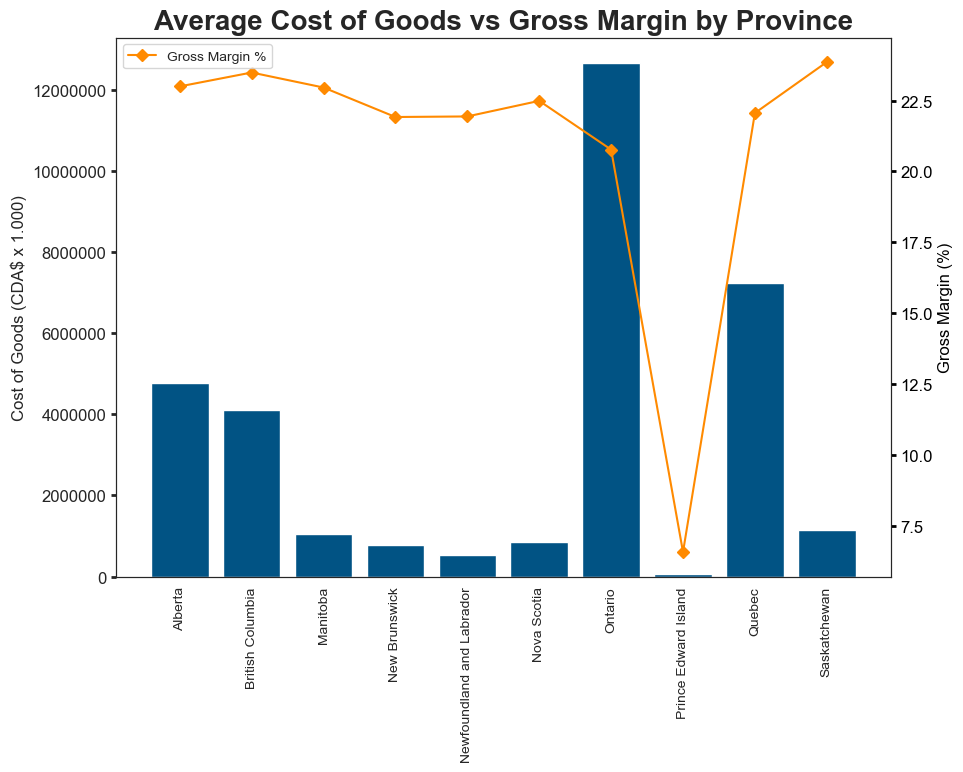

In [162]:
Q11a = FinalT3.groupby(['GEO']).agg({'Gross_Margin':'mean', 'Cost_Goods': 'mean'}).round(decimals=2).reset_index()
Q11a = Q11a[(Q11a['GEO'] != 'Nunavut') & (Q11a['GEO'] != 'Yukon') & (Q11a['GEO'] != 'Northwest Territories')]

sns.set_style("white")
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(Q11a["GEO"],
       Q11a["Cost_Goods"],
       color = "#015384")
ax.set_ylabel("Cost of Goods (CDA$ x 1.000)",
              fontsize = 12)
ax.tick_params(axis = 'y',
               width = 2,
               labelsize = 'large')
ax.tick_params(axis = 'x',
               rotation = 90)

ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax1 = ax.twinx() #Instantiate a second axes that shares the same x-axis

ax1.plot(Q11a["GEO"],
         Q11a["Gross_Margin"],
         color = "#FF8A00",
         marker = "D")
ax1.set_ylabel("Gross Margin (%)",
               color = 'black',
               fontsize = '12')
ax1.tick_params(axis = 'y',
                colors = 'black',
                width = 2,
                labelsize = 'large')
ax.set_title("Average Cost of Goods vs Gross Margin by Province", fontsize = '20', weight = 'bold' )
plt.legend(['Gross Margin %'])

plt.show()

Following the presentation above, it could be deduced that all the Provinces have high gross margin except Prince Edward Island which equally have a very low cost of goods. However, it could be observed that Ontario has a relatively low gross margin based on its cost of goods which implies Ontario might required a better cost management to maintain an higher gross margin as the Provinces that have high gross margin obviously have better cost management.

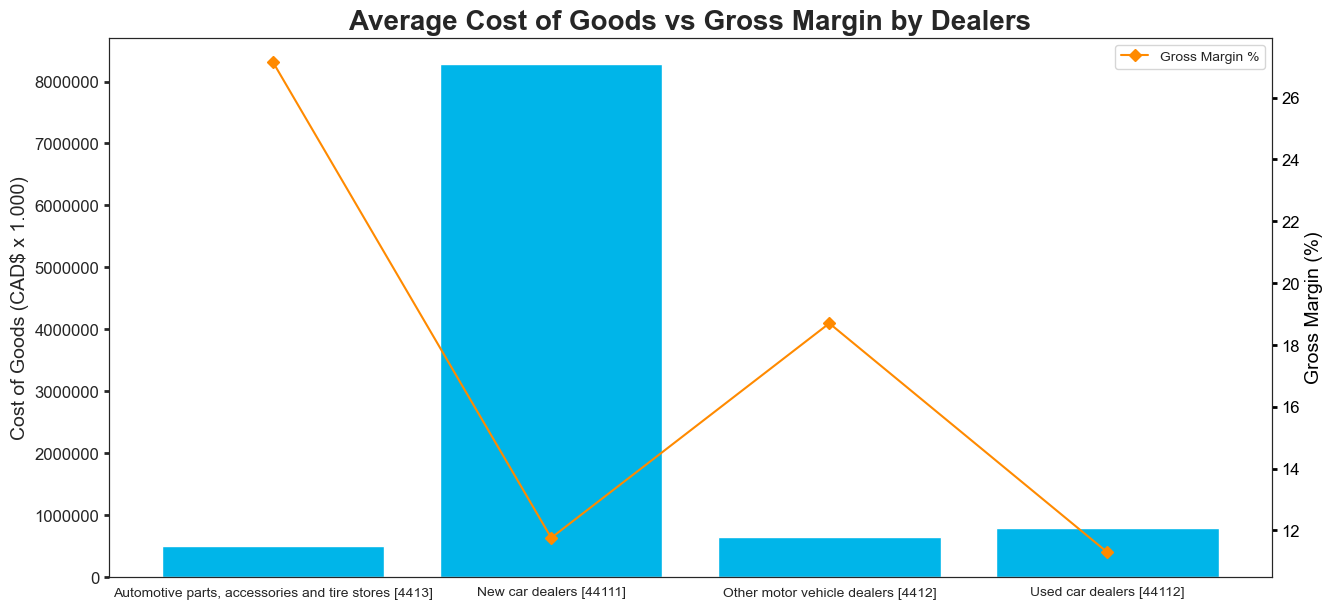

In [163]:
Q11b = FinalT3.groupby(['North American Industry Classification System (NAICS)'])\
.agg({'Gross_Margin':'mean', 'Cost_Goods': 'mean'}).round(decimals=2).reset_index()

sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 7))

ax.bar(Q11b["North American Industry Classification System (NAICS)"],
       Q11b["Cost_Goods"],
       color = "#00B5E9")
ax.set_ylabel("Cost of Goods (CAD$ x 1.000)",
              fontsize = 14)
ax.tick_params(axis = 'y',
               width = 2,
               labelsize = 'large')
ax.tick_params(axis = 'x')

ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax1 = ax.twinx() #Instantiate a second axes that shares the same x-axis

ax1.plot(Q11b["North American Industry Classification System (NAICS)"],
         Q11b["Gross_Margin"],
         color = "#FF8A00",
         marker = "D")
ax1.set_ylabel("Gross Margin (%)",
               color = 'black',
               fontsize = '14')
ax1.tick_params(axis = 'y',
                colors = 'black',
                width = 2,
                labelsize = 'large')
ax.set_title("Average Cost of Goods vs Gross Margin by Dealers", fontsize = '20', weight = 'bold' )
plt.legend(['Gross Margin %'])
plt.show()

Following the analysis above, it could be inferred that all the automotive parts, accessories and tire dealers have high gross margin with a very low cost of goods while new car dealers have very low gross margin with very high cost of goods. Also, used car dealers and other motor vehicle dealers have low cost of good but used car dealers have low gross margin while other motor vehicle dealers have a bit high gross margin.